In [1]:
## loading checkpoint files

%load_ext autoreload
%autoreload 2

from bin.graphs import *
import matplotlib.pyplot as plt
from math import ceil


In [2]:
trainset = "S9_nojitter"

if trainset=="S8full":
    doshaping = True
    # == 1) Load pickle checkpoint
    jobname = "S8full_2019-10-10_09-45-18"
    exptdir = "2019-10-10T09:45:23.421494"
    checkpoint = "draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=6_MF=5_noConsolidation=False_pc=10_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S8full_graph=True.pickle"
    taskset = "S8full"
elif trainset == "S9full":
    doshaping = True
    # == 1) Load pickle checkpoint
    jobname = "S9full_2019-10-10_09-45-29"
    exptdir = "2019-10-10T09:45:47.447037"
    checkpoint = "draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=6_MF=5_noConsolidation=False_pc=10_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S9full_graph=True.pickle"
    taskset = "S9full"
elif trainset== "S8fixedprim":
    jobname = "S8fixedprim_2019-10-10_18-23-41"
    exptdir = "2019-10-10T18:24:59.632316"
    checkpoint = "draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=1800_HR=0.5_it=6_MF=5_noConsolidation=False_pc=10_RT=2000_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S8full_graph=True.pickle"
    taskset = "S8full"
elif trainset=="S9fixedprim":
    jobname = "S9fixedprim_2019-10-10_18-23-19"
    exptdir = "2019-10-10T18:24:13.326352"
    checkpoint = "draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=1800_HR=0.5_it=5_MF=5_noConsolidation=False_pc=10_RT=2000_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S9full_graph=True.pickle"
    taskset = "S9full"
    
elif trainset=="S8_nojitter":
    jobname = "S8_nojitter_2019-10-13_23-25-52"
    exptdir = "2019-10-13T23:26:02.364547"
    taskset = "S8_nojitter"
elif trainset=="S9_nojitter":
    jobname = "S9_nojitter_2019-10-13_23-25-52"
    exptdir = "2019-10-14T08:33:57.806621"
    taskset = "S9_nojitter"
    
    
# === load the correct checkpoint
import os
import glob
F = glob.glob("experimentOutputs/draw/{}/*.pickle".format(exptdir))

iters = []
for f in F:
    g = f.find("_graph")
    
    if not f[g+7:g+8]=="T":
        iters.append(0)
    else:

        a = f.find("_it")
        b = f.find("_MF")

        iters.append(int(f[a+4:b]))
    print(f)
    print(iters[-1])
    print('----')

# --- find the file with highest iteration
# print(max(iters))
ind = [i for i, j in enumerate(iters) if j==max(iters)]
assert len(ind)==1
checkpoint = F[ind[0]]
checkpoint = checkpoint.split("/")[-1]




f = "experimentOutputs/draw/{}/{}".format(exptdir, checkpoint)
result = loadfun(f)

# == 2) Load tasks
from dreamcoder.domains.draw.makeDrawTasks import makeSupervisedTasks
tasks = makeSupervisedTasks(trainset=taskset, doshaping=True)[0]

print("Num dreamcoder tasks {}".format(len(result.taskSolutions)))
print("n supervised tasks {}".format(len(tasks)))
assert len(result.taskSolutions)==len(tasks)


# === 4) Load tools to work with tasks libraries
import dreamcoder.domains.draw.primitives as P

experimentOutputs/draw/2019-10-14T08:33:57.806621/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=4_MF=5_noConsolidation=False_pc=10_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S9_nojitter.pickle
0
----
experimentOutputs/draw/2019-10-14T08:33:57.806621/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=2_MF=5_noConsolidation=False_pc=10_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S9_nojitter_graph=True.pickle
2
----
experimentOutputs/draw/2019-10-14T08:33:57.806621/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=6_MF=5_noConsolidation=False_pc=10_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S9_nojitter.pickle
0
----
experimentOutputs/draw/2019-10-14T08:33:57.806621/draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=2_MF=5_noConsolidation=False

In [ ]:
plt.figure()
plt.xlabel("wake step")
plt.ylabel('tasks solved')
plt.plot(result.hitsAtEachWake, '-ok')


--- TASK 0
line
(reflect line angle4)
(reflect (reflect line angle2) angle2)
(reflect line angle0)
(transform line (transmat None None None None None))
--- TASK 1
(transform circle (transmat (Some scale4) None None None None))
(transform circle (transmat (Some scale4) (Some angle4) None None None))
(transform (transform circle (transmat None None (Some dist6) None None)) (transmat (Some scale4) None None None None))
(transform circle (transmat (Some scale4) None None None (Some rts)))
(transform circle (transmat (Some scale4) None None None (Some rst)))
--- TASK 2
circle
(transform circle (transmat None None (Some dist6) None None))
(reflect circle angle2)
(reflect circle angle4)
(reflect (transform circle (transmat None None (Some dist6) None None)) angle2)
--- TASK 3
(reflect line angle5)
(reflect line angle1)
(reflect (reflect line angle5) angle2)
(reflect (reflect line angle1) angle2)
(reflect (reflect line angle2) angle3)
--- TASK 4
(transform line (transmat (Some scale7) None Non

(reflect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist8) None None)))) angle6)
(reflect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (reflect (transform circle (transmat None None (Some dist4) None None)) angle2))) angle2)
--- TASK 15
(connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line))))
(reflect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)))) angle2)
(connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (connect (reflect line angle6) (connect (transfor

/Users/lucastian/anaconda3/envs/ec/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


(reflect (reflect (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)) (transmat None None (Some dist9) None None)) angle4) angle2)
(reflect (reflect (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)) (transmat None None (Some dist9) None None)) angle2) angle4)
--- TASK 22
(reflect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (reflect line angle2))) angle2)
(connect (transform circle (transmat None None (Some dist10) None None)) line)
(connect line (transform circle (transmat None None (Some dist10) None None)))
(connect (transform circle (transmat None None (Some dist10) None None)) (reflect line angle4))
(connect line (reflect (transform circle (transmat None None (Some dist10) None None)) angle4))
--- TASK 23
(connect (reflect line angle6) (connect (transform circle (transmat None None (Som

(connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect line (reflect (transform circle (transmat None None (Some dist4) None None)) angle4)) (transmat None None None (Some dist3) None)))
(connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist8) None None)) (transform circle (transmat None None (Some dist8) None None)))) (transmat None (Some angle4) None (Some dist3) None)))
--- TASK 32
(connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transma

--- TASK 36
(connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist8) None None)))) (transmat None None None (Some dist3) None)))
(connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist15) None None)))) (transmat None None None (Some dist3) None)))
(connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (trans

(reflect (reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (transform circle (transmat None None (Some dist4) None None)) (transmat None None None (Some dist3) None))) (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (transform circle (transmat None None (Some dist4) None None)))) angle2) angle2)
--- TASK 39
(connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (transform circle (transmat None None (Some dist10) None None)) (transmat None None None (Some dist3) None))) (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (S

(connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (connect (repeat line rep1 (transmat None None None (Some dist3) None)) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line))))))
--- TASK 42
(connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (transform (transform circle (transmat None None (Some dist4) None None)) (transmat None None None (Some dist3) None))))
(connect (connect (repeat (transform line 

--- TASK 46
(connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (connect (repeat line rep1 (transmat None None None (Some dist3) None)) (reflect (repeat line rep1 (transmat None None None (Some dist3) None)) angle2))) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)))))
(connect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)))) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (connect (repeat line rep1 (transmat None None None (Some dist3) None)) (re

(connect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) line)) (transmat None None None (Some dist3) None))) (connect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (connect (transform circle (transmat None None (Some dist10) None None)) (transform circle (transmat None None (Some dist4) None None)))) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None

(connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)))) (transmat None None None (Some dist3) None))))
(connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None No

(connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) line)) (transmat None None None (Some dist3) None))) (connect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (connect (transform circle (transmat None None (Some dist10) None None)) (transform circle (transmat None None (Some dist4) None None)))) (reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (connect line (transform circle (transmat None None (Some d

(connect line (reflect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)) (transmat None None (Some dist9) None None)) (transmat None None None (Some dist3) None))))) angle4))
(connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)) (transmat None None (Some dist9) None None)) (transmat None None None (Some d

(connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) line)) (transmat None None None (Some dist3) None))) (connect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (connect (transform circle (transmat None None (Some dist10) None None)) (transform circle (transmat None None (Some dist4) None None)))) (reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (connect

(connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist8) None None)) (connect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)))) (transmat None None None (Some dist3) None))))) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform line (transmat None None None (Some dist3) None))) angle4))))
(connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (connect (connect

(connect line (reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist15) None None)))) (transmat None (Some angle4) None (Some dist3) None)))) (reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (refl

(connect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)))) (transmat None None None (Some dist3) None))) (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (connect (transform circle (transmat None None (Some dist10) None None)) (transform circle (transmat None None (Some dist4) None None))))) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (refle

--- TASK 68
(connect (connect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (connect (transform circle (transmat None None (Some dist10) None None)) (transform circle (transmat None None (Some dist4) None None)))) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist2) None None)))) (transmat None None None (Some dist3) None))) angle4)) (reflect (reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflec

(connect (reflect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)))) angle2) (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)) (transmat None None (Some dist9) None None)) (transmat None None None (Some dist3) None))) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist15) None None)))) (transmat None None None (Som

(transform (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) line)) (transmat None None None (Some dist3) None))) (connect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (connect (transform circle (transmat None None (Some dist10) None None)) (transform circle (transmat None None (Some dist4) None None)))) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform line (transmat None None None (Some dist3) None))) angle4))) (transmat None (Some angle4) None None None))
(re

(connect line (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)))
(connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (reflect line angle4))
(connect line (reflect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) angle4))
--- TASK 75
(connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (reflect (connect line (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform

(reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (connect (reflect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform line (transmat None None None (Some dist3) None))))) angle2) (transform circle (transmat None None (Some dist4) None None)))) angle4)
(connect (reflect (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform line (transmat None None None (Some dist3) None))) angle4) angle2) (reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angl

(connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist15) None None)))) (transmat None (Some angle4) None (Some dist3) None)))) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)))
(connect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2)

(connect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform line (transmat None None None (Some dist3) None))) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform line (transmat None None None (Some dist3) None))) angle4)) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform line (transmat None None None (Some dist3) None))) angle2))
(connect (connect (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform line (transmat None None None (Some dist3) None))) angle2) (connect (repeat (transform line (transmat (Som

(connect (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) angle2) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist10) None None)) line)) (transmat None None None (Some dist3) None))) angle4))
(connect (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) angle2) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transfor

(connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) line)) (transmat None None (Some dist9) None None)) (transmat None (Some angle4) None (Some dist3) None))) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist15) None None)))) (transmat None None None (Some dist3) None))) angle4)))
(connect (repeat (transform line (transmat (Some sca

(connect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist8) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist15) None None)))) (transmat None (Some angle4) None (Some dist3) None)))))) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist15) None None))))

(reflect (connect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (connect (transform circle (transmat None None (Some dist10) None None)) (transform circle (transmat None None (Some dist4) None None)))) (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist15) None None)))) (transmat None (Some angle4) None (Some dist3) None)))) (reflect (connect (repeat (transform line (transmat (Some scale7

(reflect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist15) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform line (transmat None None None (Some dist3) None))))))) angle2)
(reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (transform line (transmat None None None (Some dist3) None))) (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (transform circle (transmat None None (Some dist8) None None))))) angle2)
--- TASK 94
(connect (reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) re

(reflect (connect (connect (reflect line angle6) (connect (transform circle (transmat None None (Some dist2) None None)) (reflect (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat None None (Some dist9) None None)) (transform (transform circle (transmat None None (Some dist4) None None)) (transmat None None None (Some dist3) None))) (connect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep2 (transmat None None (Some dist9) None None)) (repeat line rep1 (transmat None None None (Some dist3) None))) (transform circle (transmat None None (Some dist4) None None)))) angle2))) (reflect (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep3 (transmat None None (Some dist9) None None)) (connect (repeat (transform line (transmat (Some scale7) (Some angle2) (Some dist2) (Some dist1) None)) rep1 (transmat Non

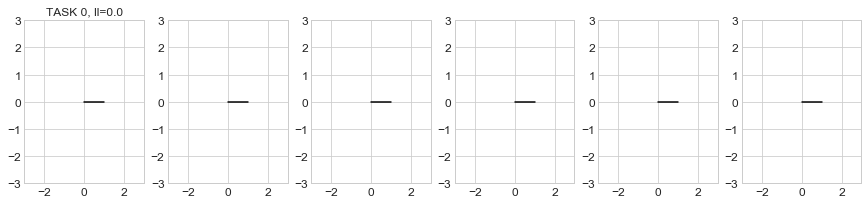

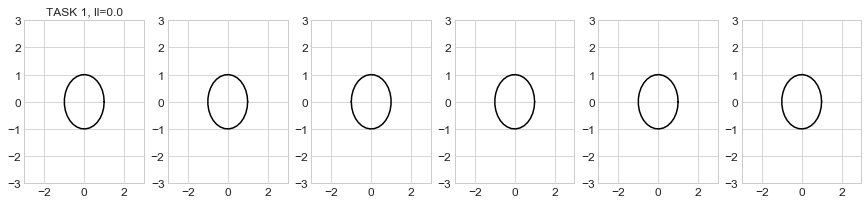

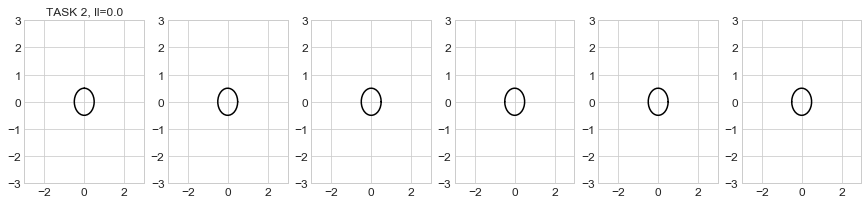

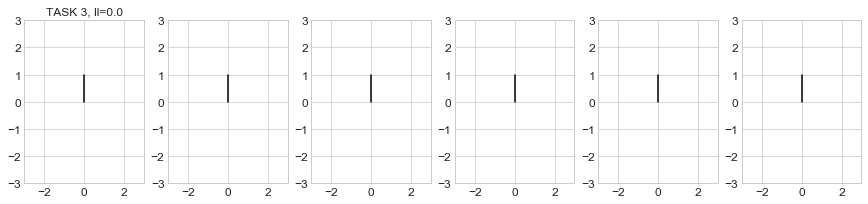

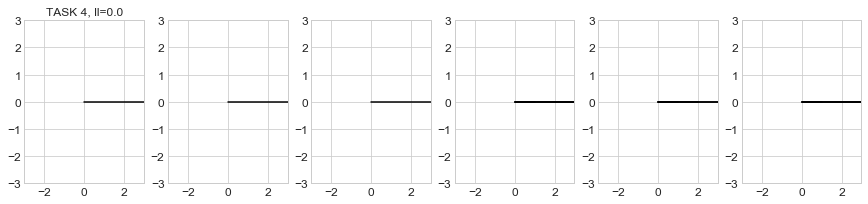

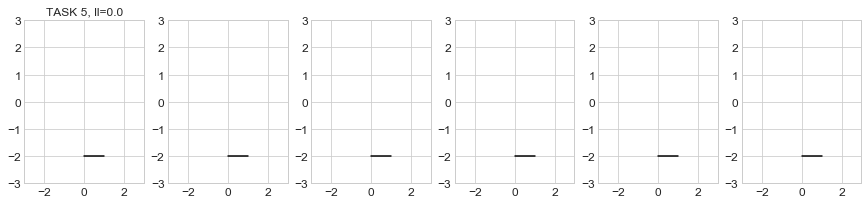

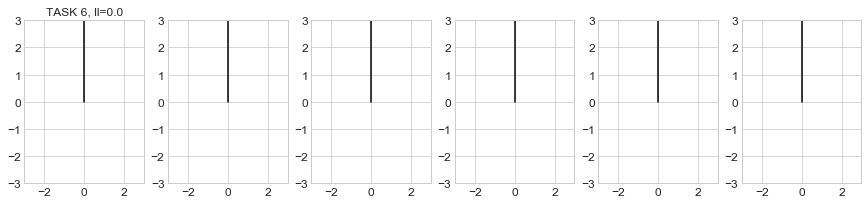

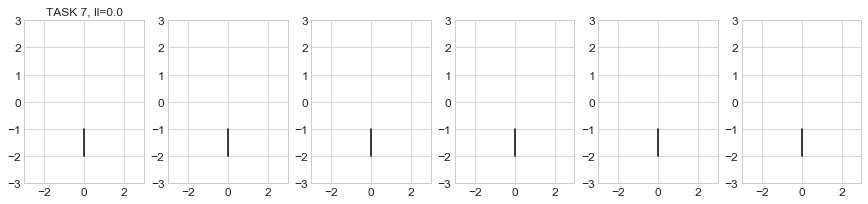

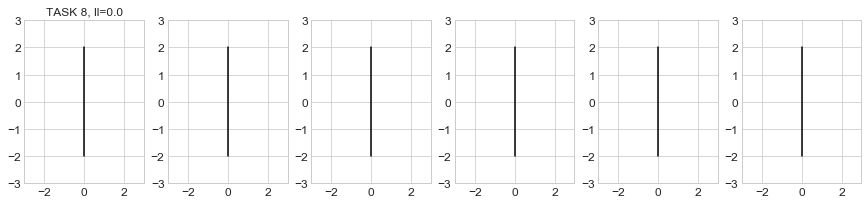

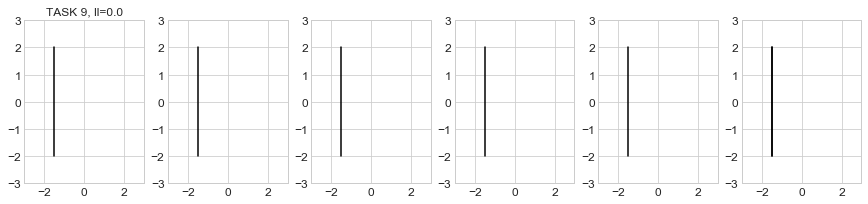

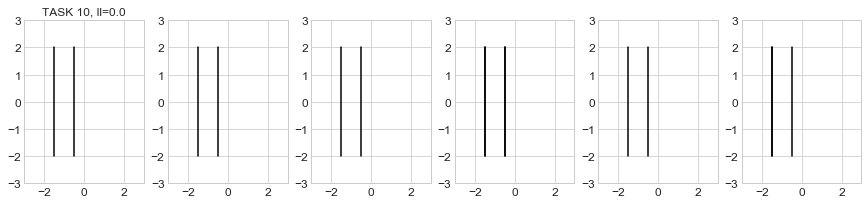

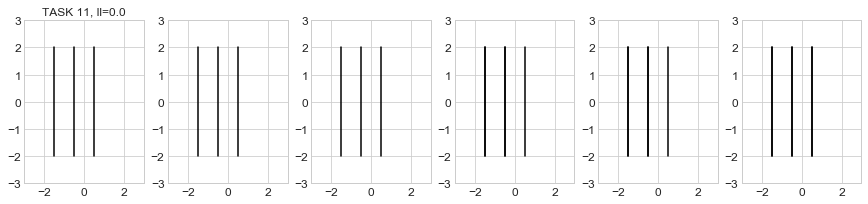

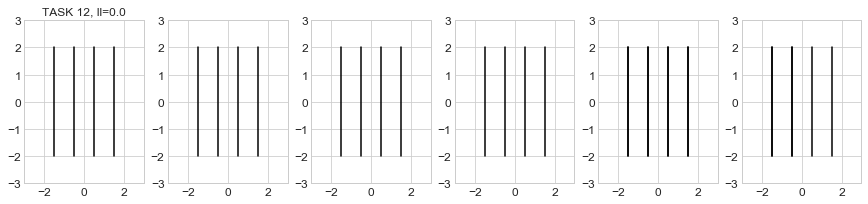

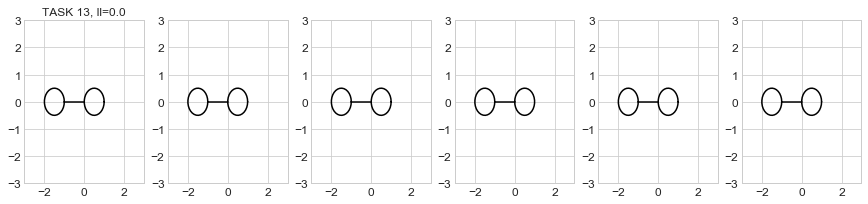

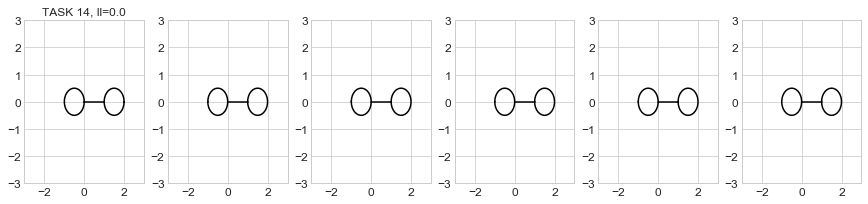

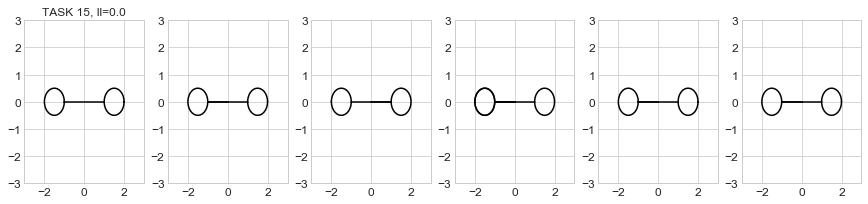

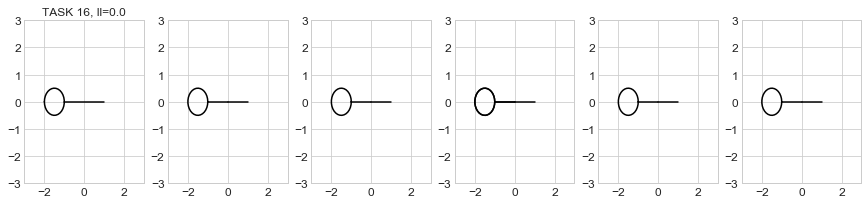

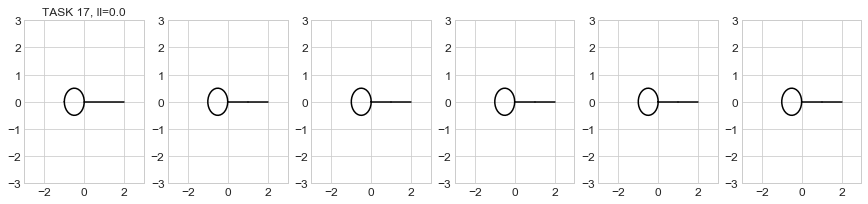

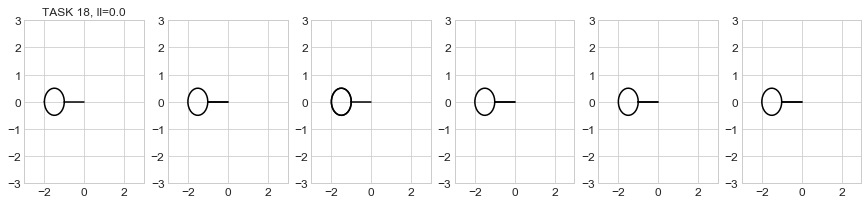

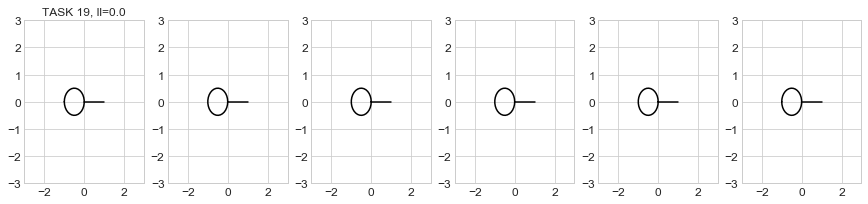

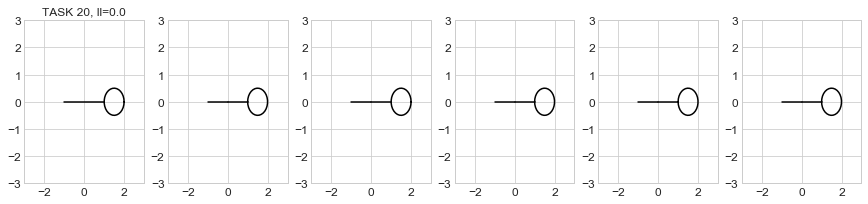

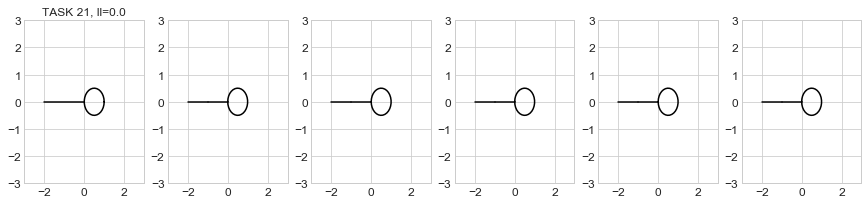

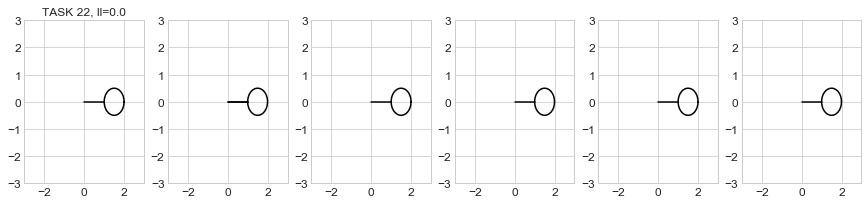

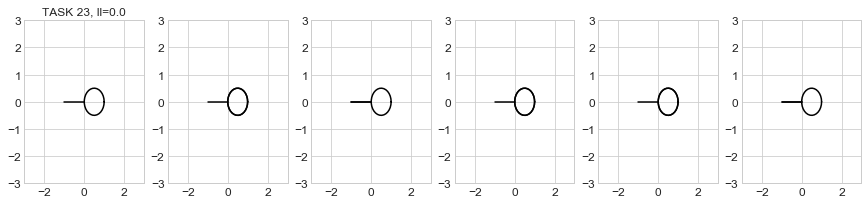

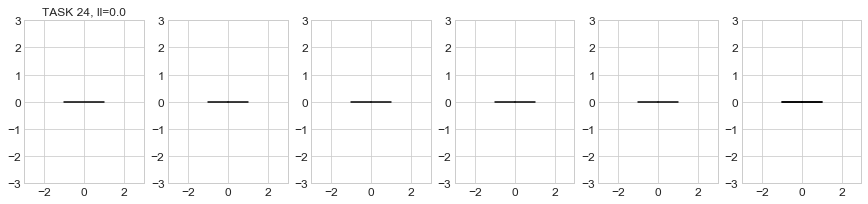

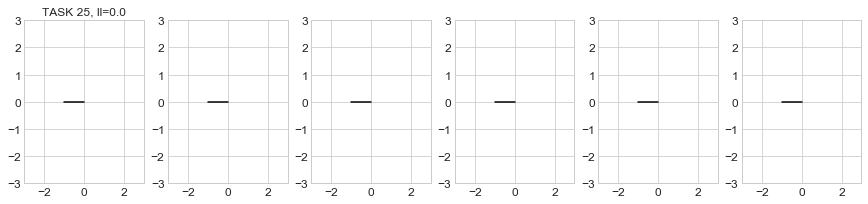

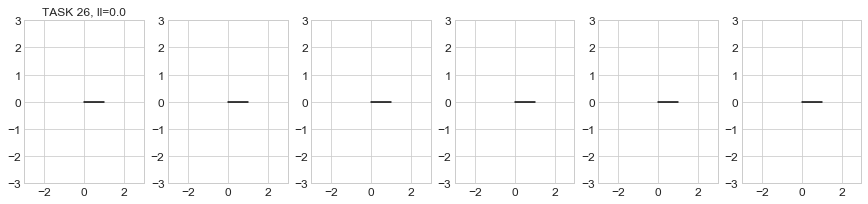

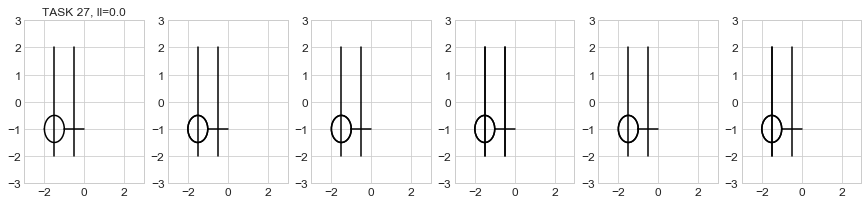

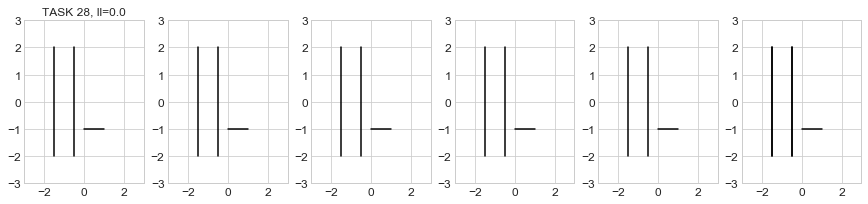

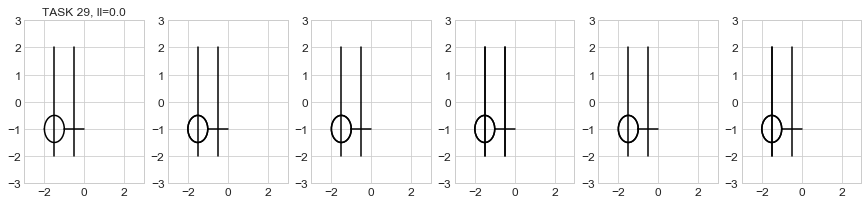

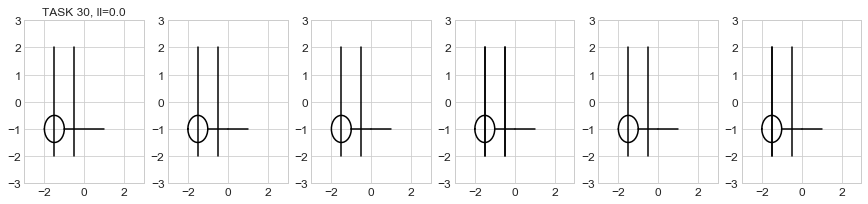

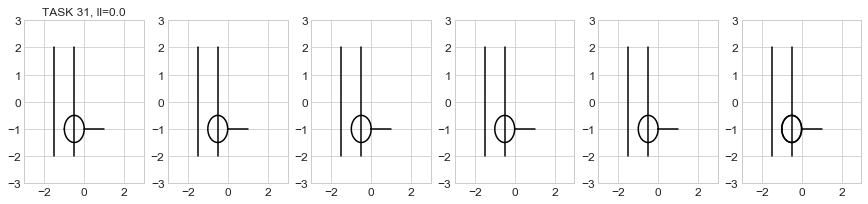

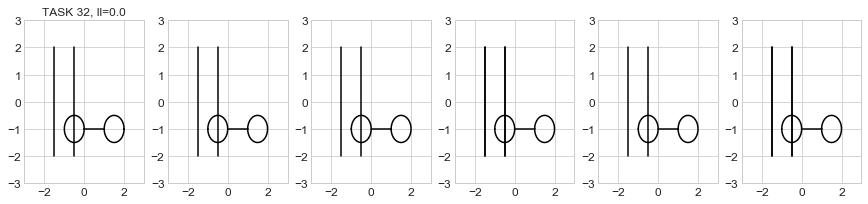

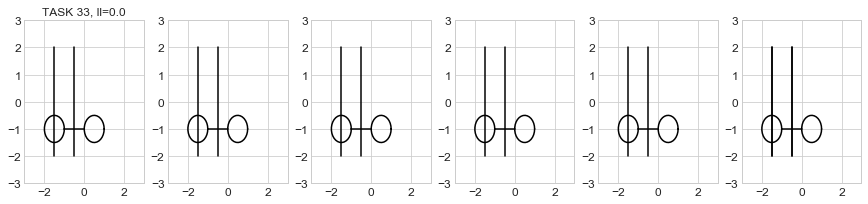

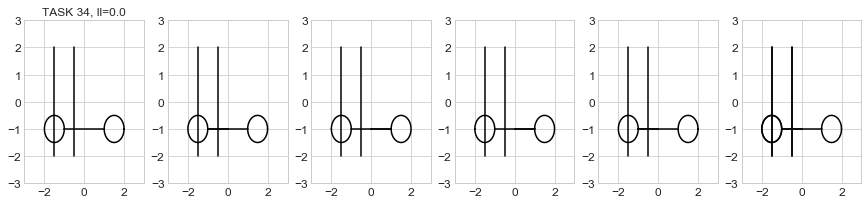

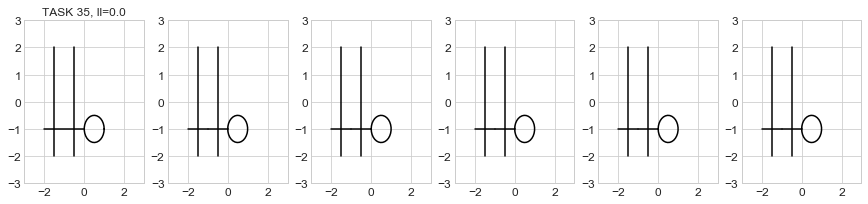

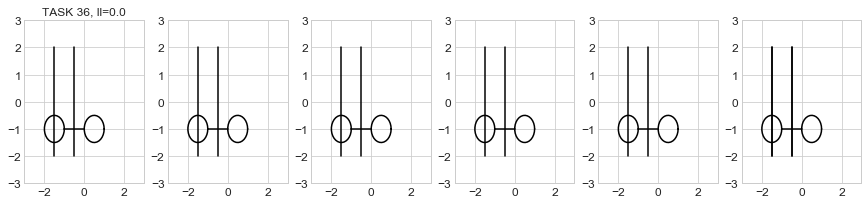

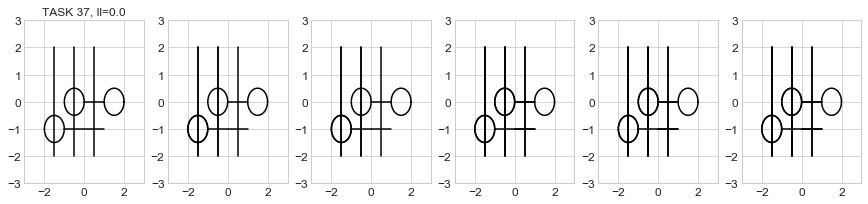

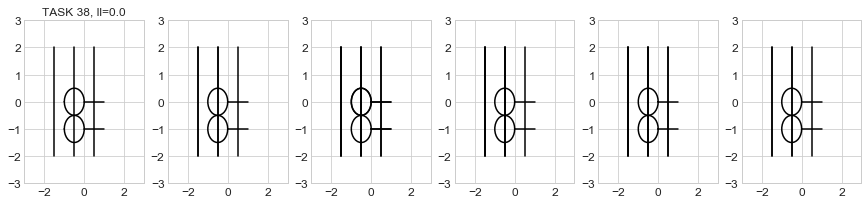

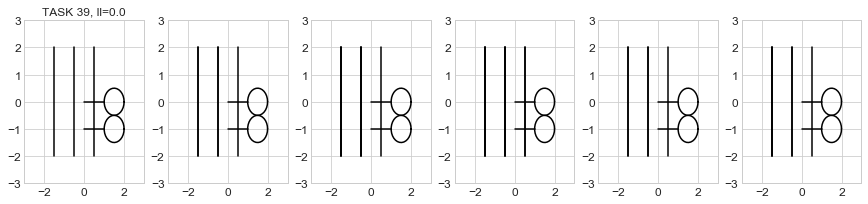

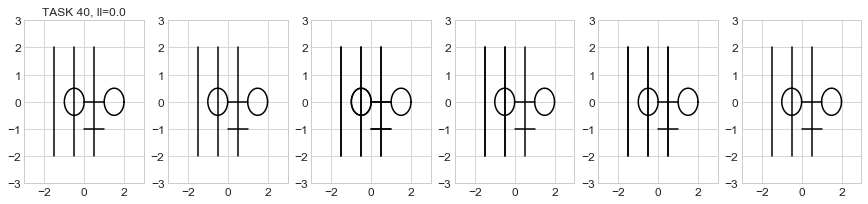

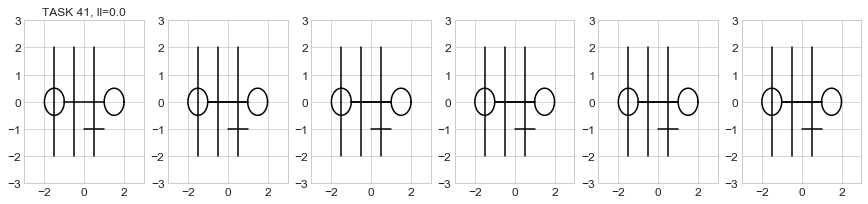

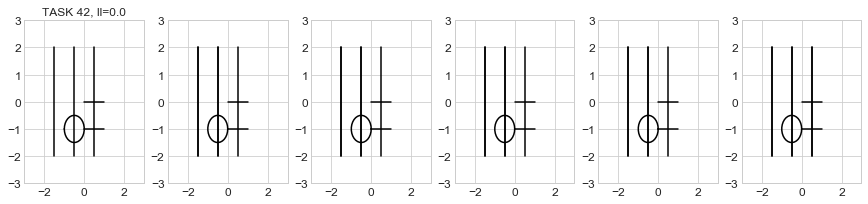

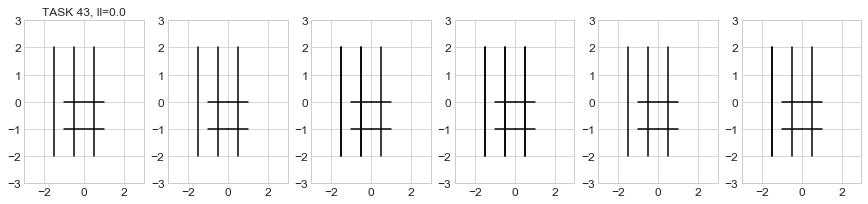

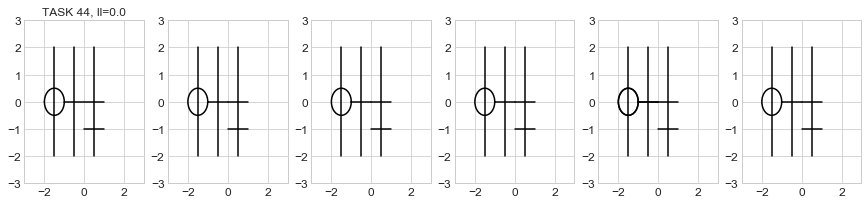

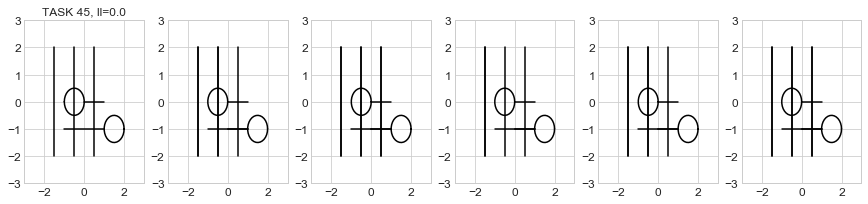

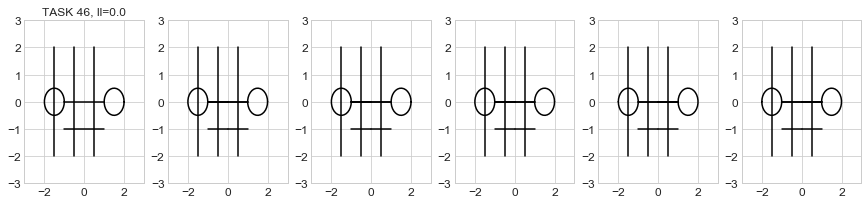

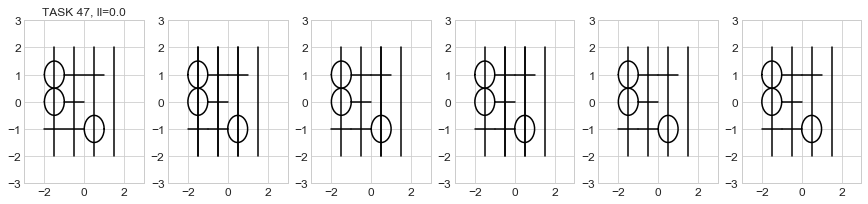

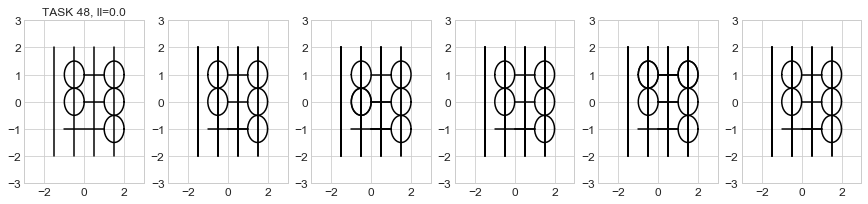

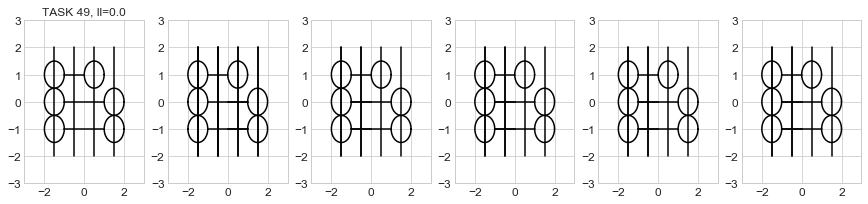

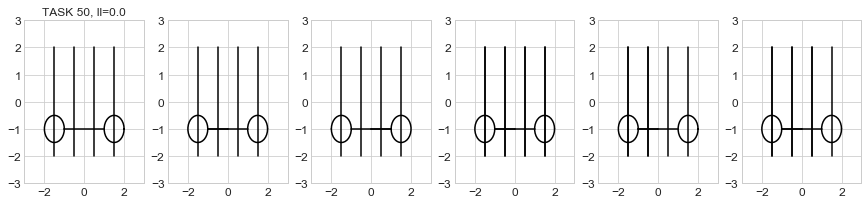

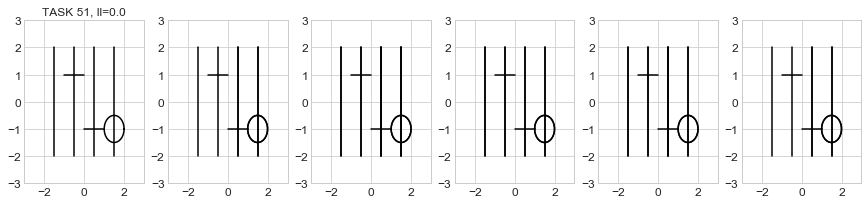

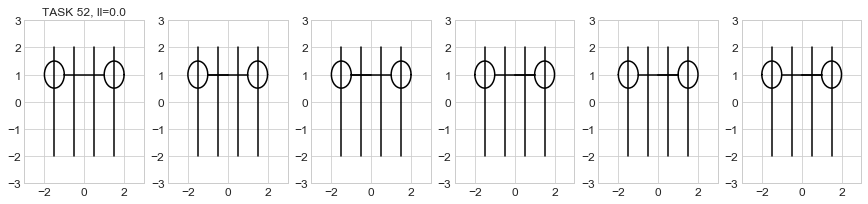

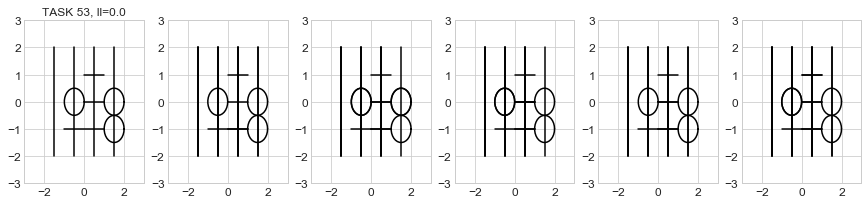

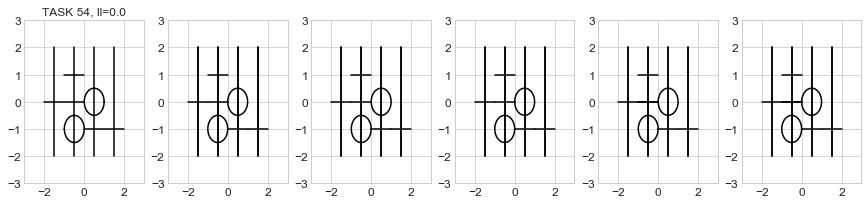

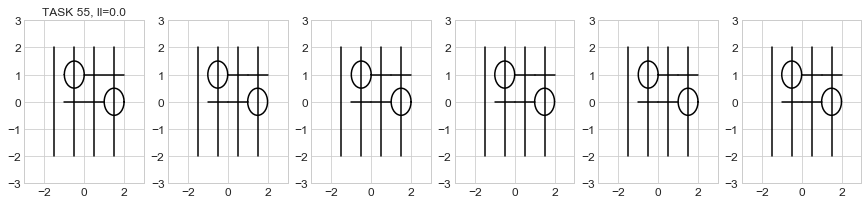

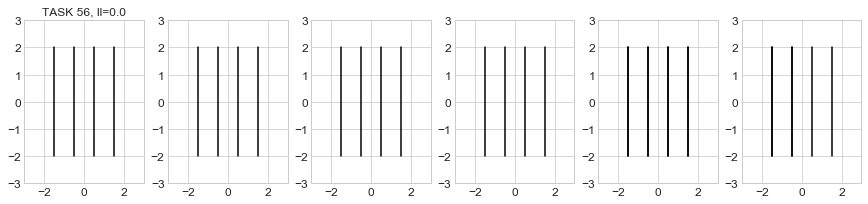

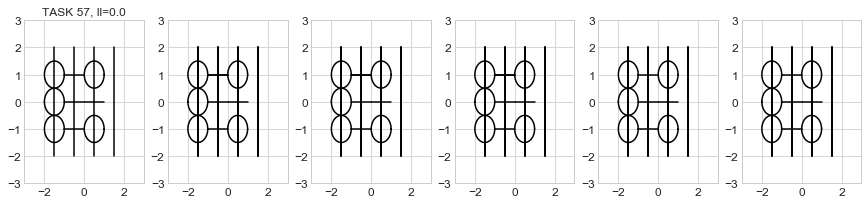

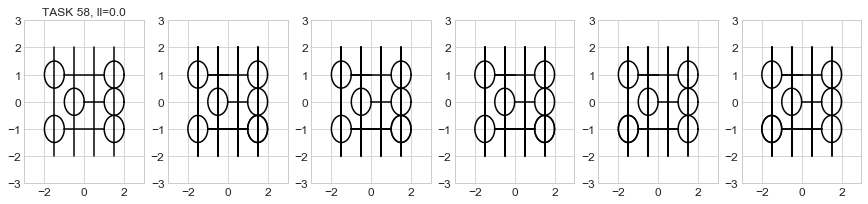

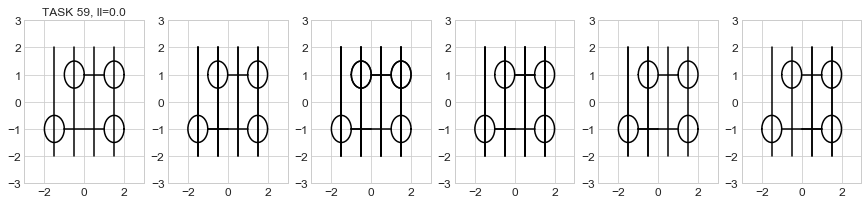

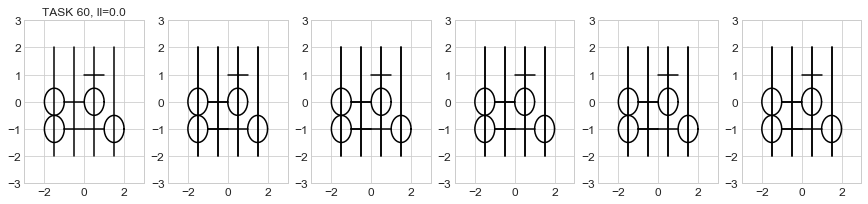

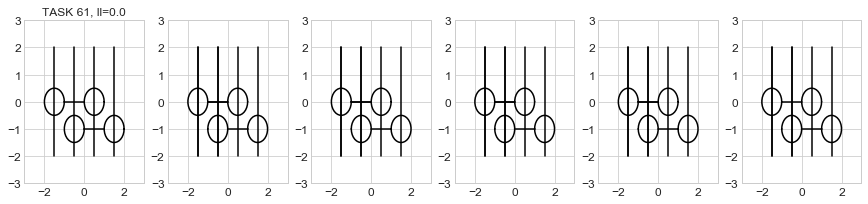

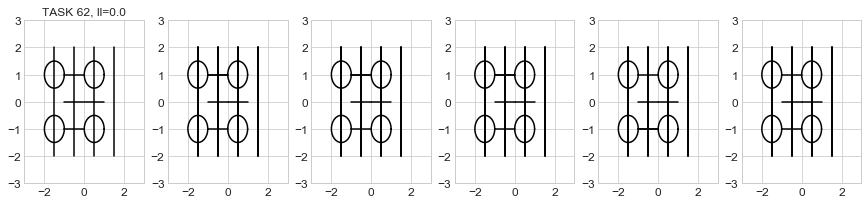

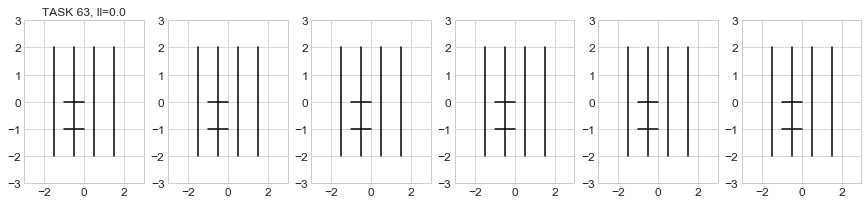

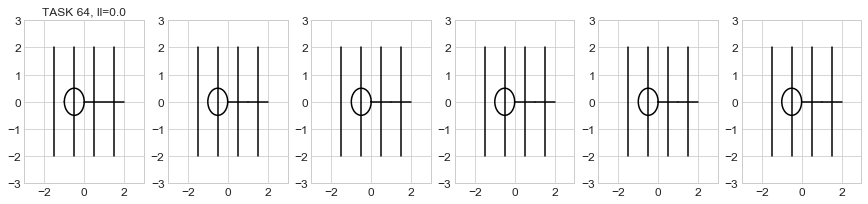

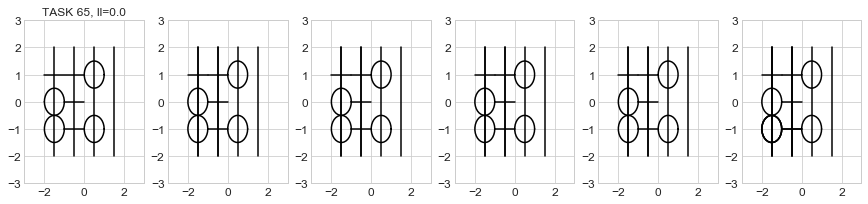

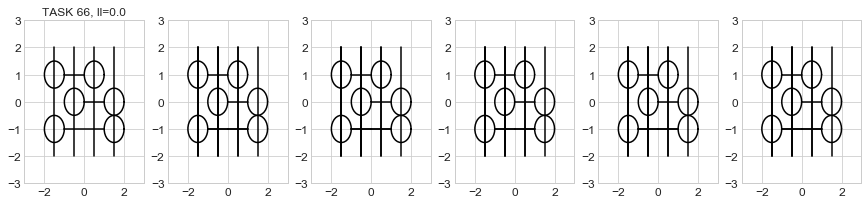

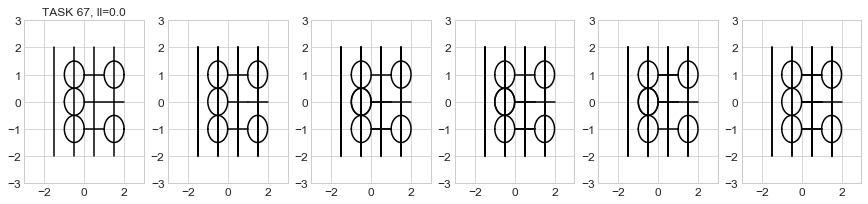

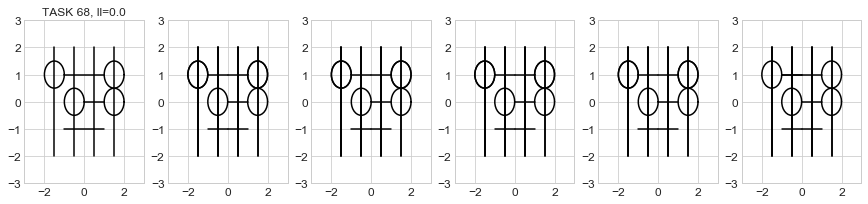

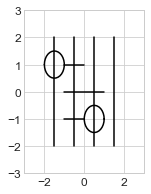

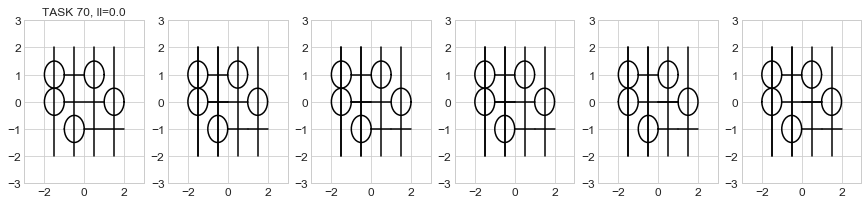

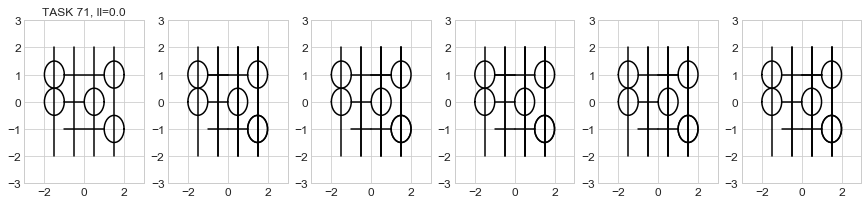

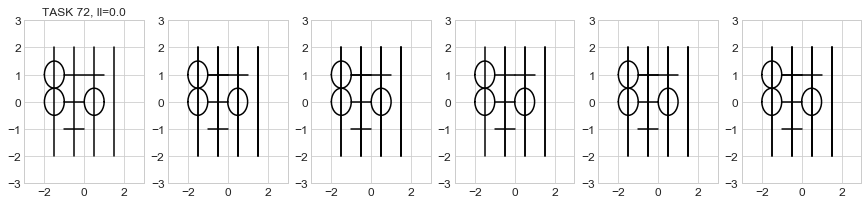

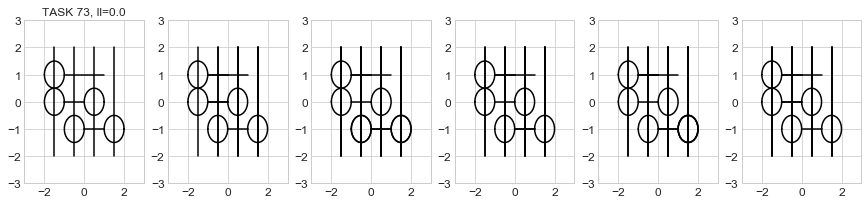

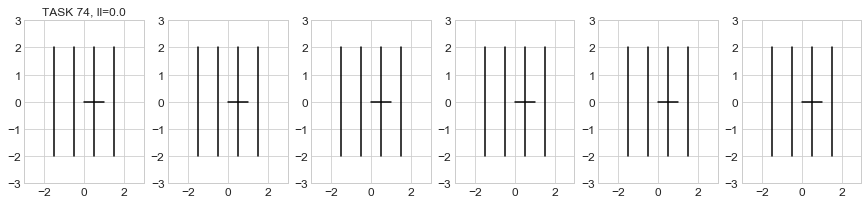

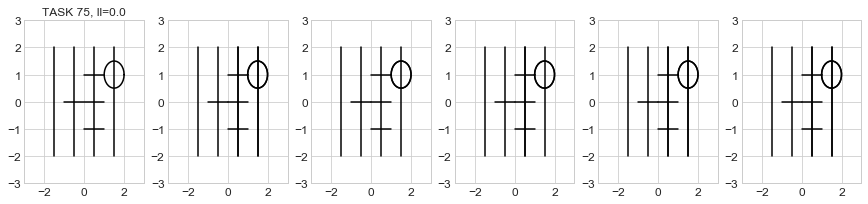

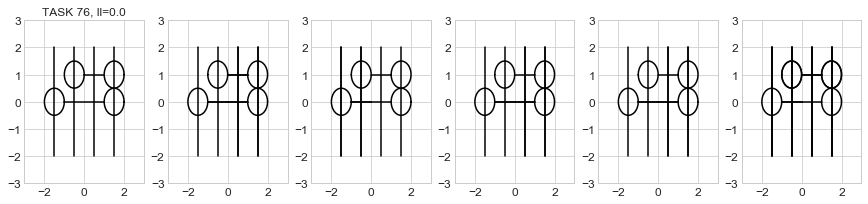

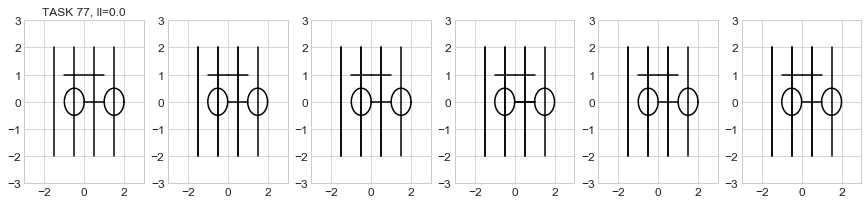

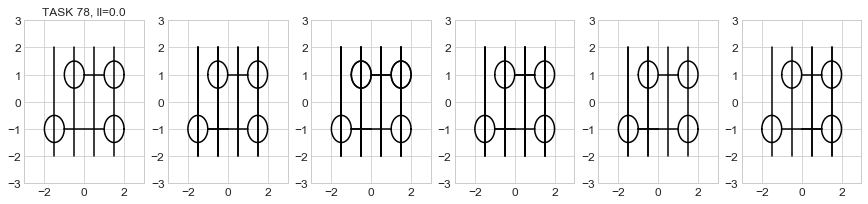

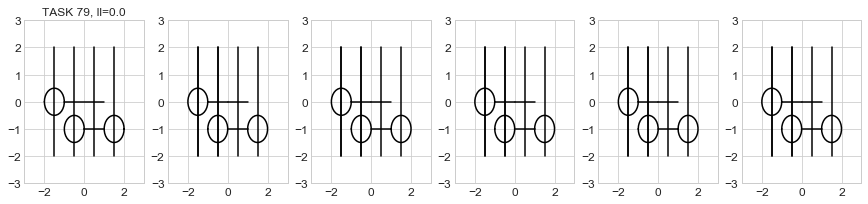

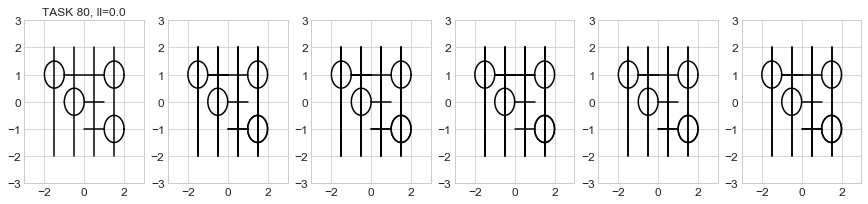

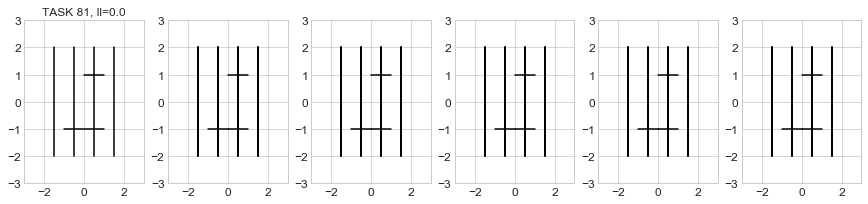

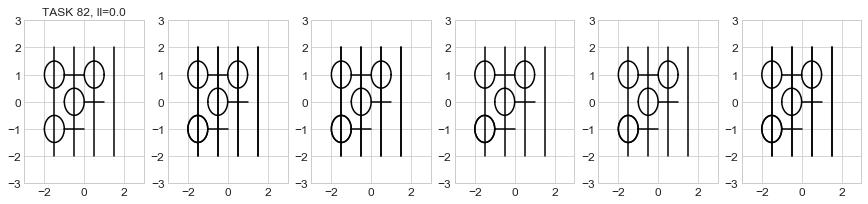

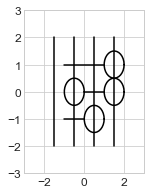

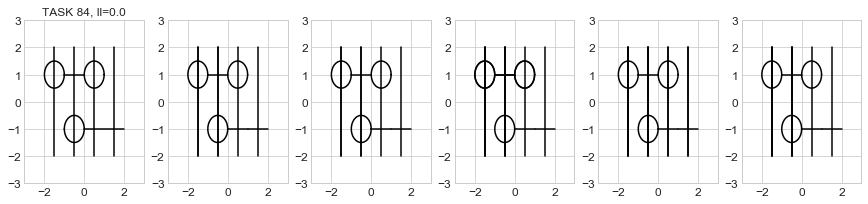

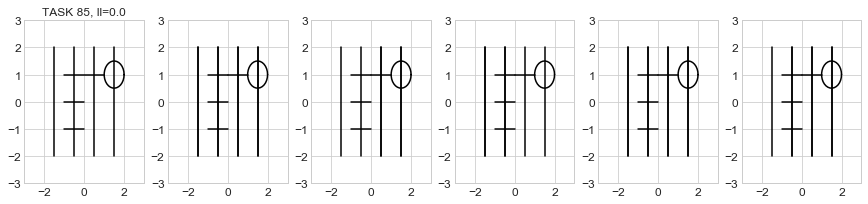

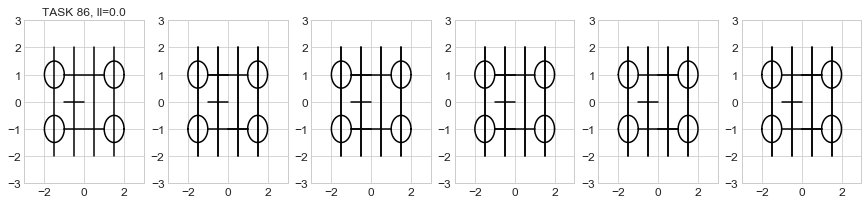

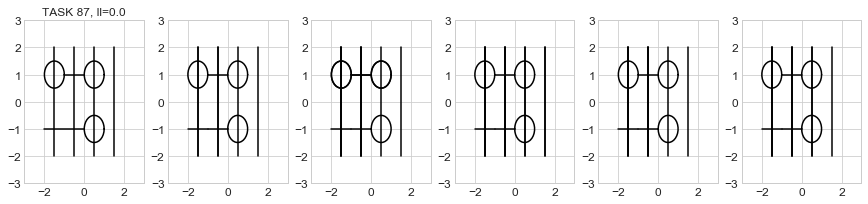

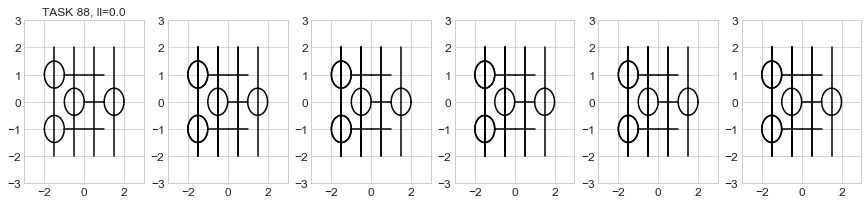

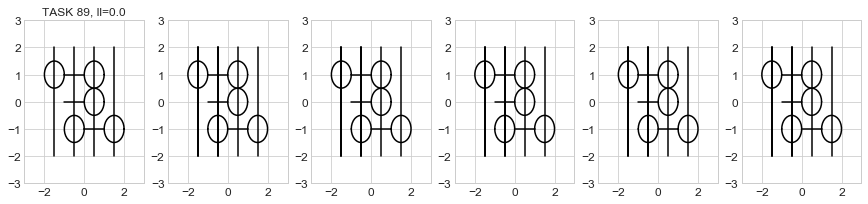

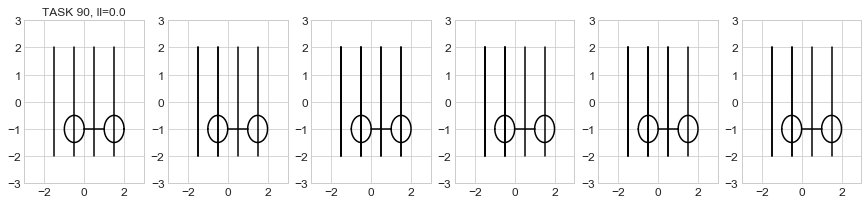

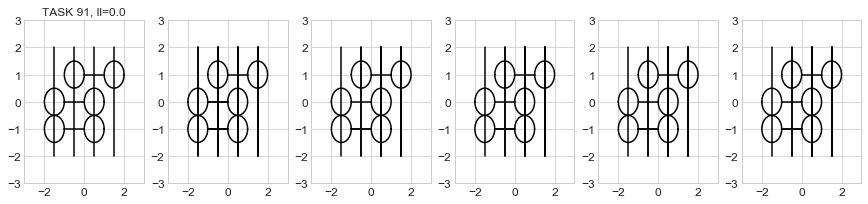

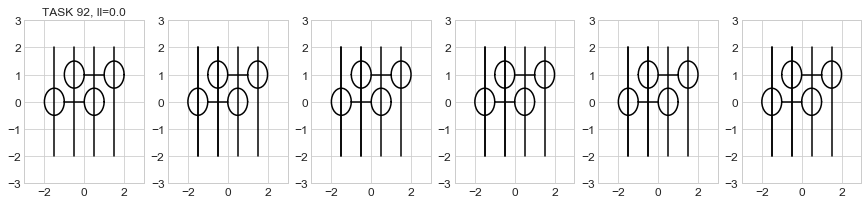

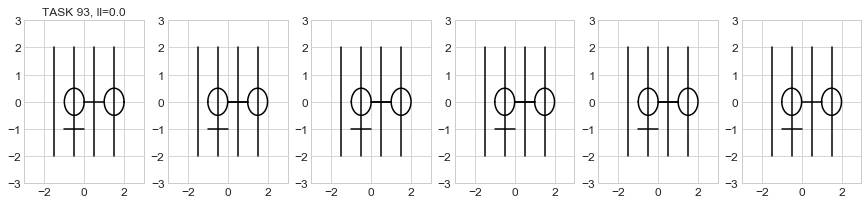

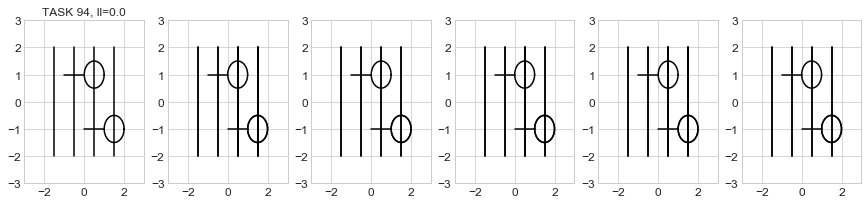

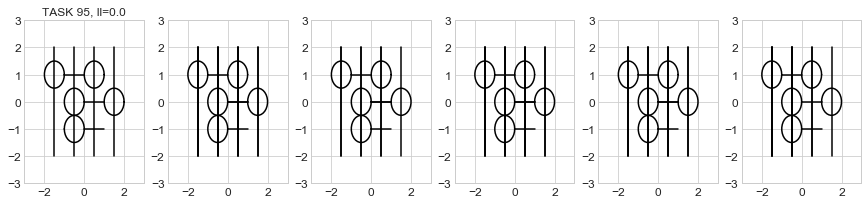

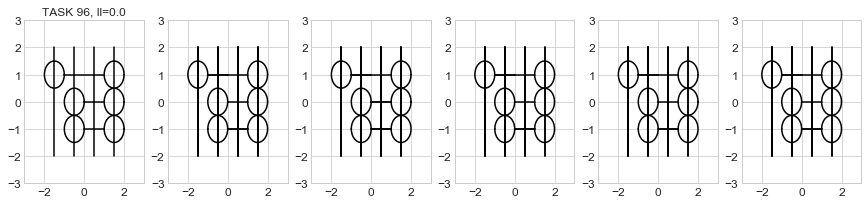

In [6]:
# ################## DISPLAY ALL TASKS AND SOLUTIONS
# ===== print all task solutions
plt.close()
for i, t in enumerate(tasks):
    plt.figure(figsize=(15,3))

    # 1) Plot this ground truth program
    ax = plt.subplot(1,6,1)
    P.plotOnAxes(t.strokes, ax)
    print("--- TASK {}".format(i))
    
    # 2) best posterior
    

    # 3) Plot frontiers solutions:    
    nfront = len(result.allFrontiers[t])
    if nfront>0:
        ll = result.allFrontiers[t].bestPosterior.logLikelihood
        plt.title("TASK {}, ll={}".format(i, ll))
        for ii, f in enumerate(result.allFrontiers[t]):
            ax = plt.subplot(1,6,ii+2)
            P.plotOnAxes(f.program.evaluate([]), ax)
#             plt.title(f.program.betaNormalForm())
            print(f.program.betaNormalForm())
    else:
        print("No frontiers")

In [58]:
# ====== plot a specific frontiers programs
tasknum =96
for f in result.allFrontiers[tasks[tasknum]]:
    print(f)
    print('--')

FrontierEntry(program=(#(lambda (lambda (connect (reflect (connect $0 $1) angle0) $1))) (#(connect (transform (connect (transform (#(lambda (transform line (transmat None $0 None (Some dist1) None))) None) #(transmat None None None (Some dist9) None)) #(repeat (transform #(transform line (transmat (Some scale7) (Some angle2) None (Some dist1) None)) (transmat None None (Some dist4) None None)) rep2 (transmat None (Some angle4) None None None))) (transmat None None (Some dist3) None None))) line) (transform (#(lambda (lambda (connect (reflect (connect $0 $1) angle0) $1))) #(repeat (transform #(transform line (transmat (Some scale7) (Some angle2) None (Some dist1) None)) (transmat None None (Some dist4) None None)) rep2 (transmat None (Some angle4) None None None)) line) #(transmat None None (Some dist9) None None))), logPrior=-20.305144527684213, logLikelihood=0.0
--
FrontierEntry(program=(#(lambda (lambda (connect (reflect (connect $0 $1) angle0) $1))) (#(connect (transform (connect (t

In [8]:
prettyProgram(result.allFrontiers[tasks[tasknum]].bestPosterior.program.betaNormalForm(), Lisp=True)


NameError: name 'tasknum' is not defined

subplot 1
#(lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) dist2) $0)))
<function Abstraction.evaluate.<locals>.<lambda> at 0x1c40cb66a8>
cant plot
----
subplot 2
#(#(lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 (#(lambda (transform circle (transmat None None (Some $0) None None))) $1)) rep1))) dist2 None)
[array([[-1.5, -2. ],
       [-1.5,  2. ]]), array([[-0.5, -2. ],
       [-0.5,  2. ]]), array([[ 0., -1.],
       [-1., -1.]]), array([[-1.        , -1.        ],
       [-1.01168972, -0.89251478],
       [-1.04621229, -

----
subplot 6
#(#(lambda (connect (#(lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) ($1 (repeat line rep1 (transmat None None None (Some dist3) None)))))) (lambda $0) rep2) (connect $0 (#(lambda (transform circle (transmat None None (Some $0) None None))) dist4)))) (#(lambda (transform circle (transmat None None (Some $0) None None))) dist10))
[array([[-1.5, -2. ],
       [-1.5,  2. ]]), array([[-0.5, -2. ],
       [-0.5,  2. ]]), array([[ 0.5, -2. ],
       [ 0.5,  2. ]]), array([[0., 0.],
       [1., 0.]]), array([[ 0., -1.],
       [ 1., -1.]]), array([[ 2.00000000e+00,  0.00000000e+00],
       [ 1.98831028e+00,  1.07485220e-01],
       [ 1.95378771e+00,  2.09944551e-01],
       [ 1.89804653e+00,  3.02587108e-01],
       [ 1.82369314e+00,  3.81081028e-01],
       [ 1.73420422e+00,  4.41756022e-01],
       [ 1.63376417e+00,

       [-1.        , -1.        ]])]
----
subplot 15
#(lambda (lambda (connect $1 (reflect ($0 (#(lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 (#(lambda (transform circle (transmat None None (Some $0) None None))) $1)) rep1))) dist15)) angle4))))
<function Abstraction.evaluate.<locals>.<lambda> at 0x1c40917d90>
cant plot
----
subplot 16
#(lambda (connect (#(lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) ($1 (repeat line rep1 (transmat

----
subplot 30
transmat
Curried(<function _makeAffine at 0x1c23be1048>/5)
cant plot
----
subplot 31
transform
Curried(<function _tform at 0x1c23be11e0>/2)
cant plot
----
subplot 32
reflect
Curried(<function _reflect at 0x1c23be1268>/2)
cant plot
----
subplot 33
connect
Curried(<function _connect at 0x1c23be1378>/2)
cant plot
----
subplot 34
repeat
Curried(<function _repeat at 0x1c23be12f0>/3)
cant plot
----
subplot 35
scale0
0.5
cant plot
----
subplot 36
scale1
1.0
cant plot
----
subplot 37
scale2
1.25
cant plot
----
subplot 38
scale3
1.5
cant plot
----
subplot 39
scale4
2.0
cant plot
----
subplot 40
scale5
2.5
cant plot
----
subplot 41
scale6
3.0
cant plot
----
subplot 42
scale7
4.0
cant plot
----
subplot 43
dist0
-2.5
cant plot
----
subplot 44
dist1
-2.0
cant plot
----
subplot 45
dist2
-1.5
cant plot
----
subplot 46
dist3
-1.0
cant plot
----
subplot 47
dist4
-0.5
cant plot
----
subplot 48
dist5
-0.25
cant plot
----
subplot 49
dist6
0
cant plot
----
subplot 50
dist7
0.25
cant plot
--

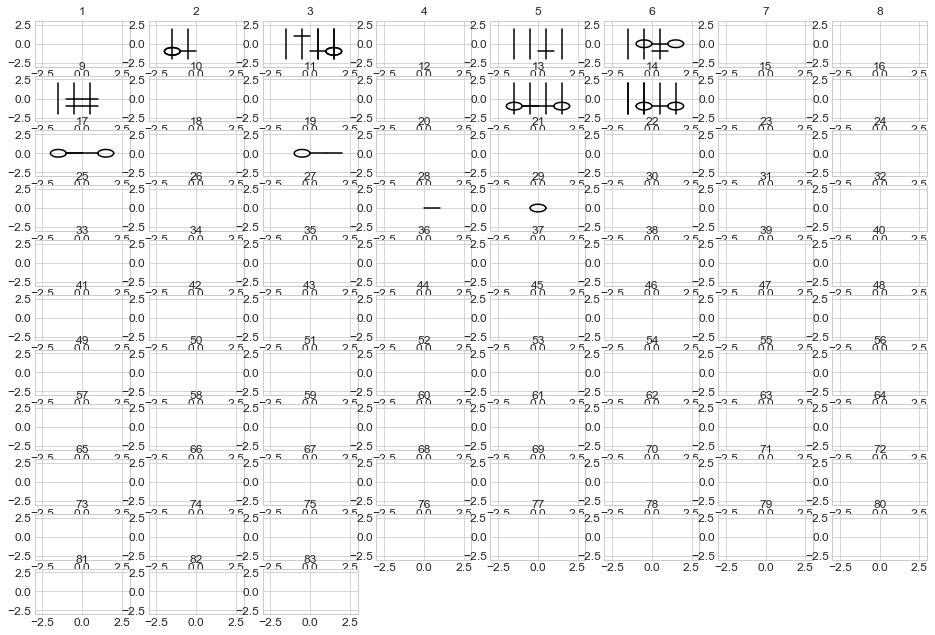

In [27]:
Nprim = len(result.grammars[-1].primitives)
plt.figure(figsize=(16, 2*ceil(Nprim/8)))
cc=1
for p in result.grammars[-1].primitives:
    print("subplot {}".format(cc))
    print(p)
    print(p.evaluate([]))
    try:
        A = p.evaluate([])
        ax = plt.subplot(ceil(Nprim/8)*2, 8, cc)
        plt.title(cc)
        cc+=1
        P.plotOnAxes(A, ax)
    except:
        print("cant plot")
    print('----')

In [4]:
primcodes = {
    "#(lambda (transform circle (transmat None None (Some $0) None None)))":"CIRCLE_$X",
    "#(lambda (lambda (connect (reflect line angle6) (connect (CIRCLE_$X $1) $0))))":"HLINE + CIRCLE_$X + $PRIM",
    "#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None))))":"VLINE_LOW_$S_$X",
    "#(lambda (repeat (VLINE_LOW_$S_$X (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None)))":"VLINE_LONG_LEFT_$REP_$X",
    "#(lambda (lambda (lambda (connect (VLINE_LONG_LEFT_$REP_$X $0) (transform $1 (transmat None $2 None (Some dist3) None))))))":"VLINE_LONG_LEFT_$REP_$X + $PRIM_LOW_$ANGLE",
    "#(transform (HLINE + CIRCLE_$X + $PRIM dist2 line) (transmat None None (Some dist9) None None))":"LEFT_LOLLI_SHIFTEDRIGHT",
    "#(lambda (lambda (connect (VLINE_LONG_LEFT_$REP_$X $0) ($1 (repeat line rep1 (transmat None None None (Some dist3) None))))))":"GRATING + SMALL_LINE_LOW",
    "#(lambda (lambda (connect $1 (reflect ($0 (#(lambda (lambda (VLINE_LONG_LEFT_$REP_$X + $PRIM_LOW_$ANGLE $0 (HLINE + CIRCLE_$X + $PRIM dist2 (CIRCLE_$X $1)) rep1))) dist15)) angle4))))":"GRATING + BARBELL?",
    "#(lambda (connect (GRATING + SMALL_LINE_LOW (lambda $0) rep2) (connect $0 (CIRCLE_$X dist4))))": "(GRATING + SMALL_LINE_LOW + CIRCLE)",
    "#(lambda (reflect $0 angle2))":"(HFLIP)",
    "#(lambda (connect (reflect line angle6) (connect (CIRCLE_$X dist2) $0)))":"LOLLI_LEFT_SMALL",
    "#(VLINE_LONG_LEFT_$REP_$X + $PRIM_LOW_$ANGLE None line rep3)":"(GRATING + LINE_$ANGLE)",
    "#(lambda (lambda (VLINE_LONG_LEFT_$REP_$X + $PRIM_LOW_$ANGLE $0 (HLINE + CIRCLE_$X + $PRIM dist2 (CIRCLE_$X $1)) rep1)))":"(GRATING + BARBELL?)"
}
# note will do in order from top to bottom


# ==== go thru all primitives and replace if possible
P = result.grammars[-1].primitives
for i, p in enumerate(P):
    pp = str(p)
    for key in primcodes.keys():
        pp = pp.replace(key, primcodes[key])
    print(i)
    print(pp)
    print('-------')

0
LOLLI_LEFT_SMALL
-------
1
#((GRATING + BARBELL?) dist2 None)
-------
2
#((HFLIP) (GRATING + BARBELL? ((GRATING + BARBELL?) dist2 None) (lambda (GRATING + LINE_$ANGLE))))
-------
3
#(lambda (connect (#(lambda (VLINE_LONG_LEFT_$REP_$X + $PRIM_LOW_$ANGLE $0 (HLINE + CIRCLE_$X + $PRIM dist10 line))) None rep3) (GRATING + BARBELL? #((GRATING + SMALL_LINE_LOW + CIRCLE) (CIRCLE_$X dist10)) (lambda $1))))
-------
4
(GRATING + LINE_$ANGLE)
-------
5
#((GRATING + SMALL_LINE_LOW + CIRCLE) (CIRCLE_$X dist10))
-------
6
#(lambda (VLINE_LONG_LEFT_$REP_$X + $PRIM_LOW_$ANGLE $0 (HLINE + CIRCLE_$X + $PRIM dist10 line)))
-------
7
#(lambda (lambda (GRATING + BARBELL? $1 (lambda (connect (GRATING + SMALL_LINE_LOW $1 rep3) ((HFLIP) ($0 None)))))))
-------
8
#(GRATING + SMALL_LINE_LOW (lambda (connect $0 ((HFLIP) $0))) rep2)
-------
9
#(lambda (connect (VLINE_LONG_LEFT_$REP_$X + $PRIM_LOW_$ANGLE None (CIRCLE_$X $0) rep1) (connect (GRATING + SMALL_LINE_LOW (lambda $0) rep2) (CIRCLE_$X $0))))
-------
10
(

0


#(lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) dist2) $0))) : tstroke -> tstroke


[tstroke]
[[[array([[0., 0.],
       [1., 0.]])], [array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       [-8.08909983e-02, -4.93413261e-01],
   

#(#(lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 (#(lambda (transform circle (transmat None None (Some $0) None None))) $1)) rep1))) dist2 None) : tstroke


[]
[]
2


#(#(lambda (reflect $0 angle2)) (#(lambda (lambda (connect $1 (reflect ($0 (#(lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 (#(lambda (transform circle (transmat None None (Some $0) None None))) $1)) rep1))) dist15)) angle4)))) (#(lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (tr

[]
[]
3


#(lambda (connect (#(lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist10 line))) None rep3) (#(lambda (lambda (connect $1 (reflect ($0 (#(lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 (#(lambda (transform circle (tr

[tstroke]
[[[array([[0., 0.],
       [1., 0.]])], [array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       [-8.08909983e-02, -4.93413261e-01],
   

#(#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) None line rep3) : tstroke


[]
[]
5


#(#(lambda (connect (#(lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) ($1 (repeat line rep1 (transmat None None None (Some dist3) None)))))) (lambda $0) rep2) (connect $0 (#(lambda (transform circle (transmat None None (Some $0) None None))) dist4)))) (#(lambda (transform circle (transmat None None (Some $0) None None))) dist10)) : tstroke


[]
[]
6


#(lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist10 line))) : maybe(tangle) -> trep -> tstroke


[maybe(tangle), trep]
[[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469], [1, 2, 3, 4, 5, 6, 7]]
7


#(lambda (lambda (#(lambda (lambda (connect $1 (reflect ($0 (#(lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 (#(lambda (transform circle (transmat None None (Some $0) None None))) $1)) rep1))) dist15)) angle4)))) $1 (lambda (connect (#(lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) ($1 (repeat line rep1 (transmat None None None (Some dist3) None)))))) $1 rep3) (#(lambda (reflect $0 angle2)) ($0 None))))))) : tstroke -> (tstroke -> tstr

[tstroke, tstroke -> tstroke]
[[[array([[0., 0.],
       [1., 0.]])], [array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       [-8.08909983e-02, -

#(#(lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) ($1 (repeat line rep1 (transmat None None None (Some dist3) None)))))) (lambda (connect $0 (#(lambda (reflect $0 angle2)) $0))) rep2) : tstroke


[]
[]
9


#(lambda (connect (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) None (#(lambda (transform circle (transmat None None (Some $0) None None))) $0) rep1) (connect (#(lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) ($1 (repeat line rep1 (transmat None None None (Some dist3) None)))))) (lambda $0) rep2) (#(lambda (transform circle (transmat None None (Some $0) None None))) $0)))) : tdist -> tstroke


[tdist]
[[-2.0, -1.0, 0, 1.0, 2.0]]
10


#(lambda (reflect $0 angle2)) : tstroke -> tstroke


[tstroke]
[[[array([[0., 0.],
       [1., 0.]])], [array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       [-8.08909983e-02, -4.93413261e-01],
   

#(lambda (#(lambda (lambda (connect $1 (reflect ($0 (#(lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 (#(lambda (transform circle (transmat None None (Some $0) None None))) $1)) rep1))) dist15)) angle4)))) (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 #(transform (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None

[maybe(tangle)]
[[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469]]
12


#(#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) None #(#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist10 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 line)) rep3) : tstroke


[]
[]
13


#(#(lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) ($1 (repeat line rep1 (transmat None None None (Some dist3) None)))))) (lambda (#(lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 (#(lambda (transform circle (transmat None None (Some $0) None None))) $1)) rep1))) dist15 (Some angle4))) rep3) : tstroke


[]
[]
14


#(lambda (lambda (connect $1 (reflect ($0 (#(lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 (#(lambda (transform circle (transmat None None (Some $0) None None))) $1)) rep1))) dist15)) angle4)))) : tstroke -> ((maybe(tangle) -> tstroke) -> tstroke) -> tstroke


[tstroke, (maybe(tangle) -> tstroke) -> tstroke]
[[[array([[0., 0.],
       [1., 0.]])], [array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       

#(lambda (connect (#(lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) ($1 (repeat line rep1 (transmat None None None (Some dist3) None)))))) (lambda $0) rep2) (connect $0 (#(lambda (transform circle (transmat None None (Some $0) None None))) dist4)))) : tstroke -> tstroke


[tstroke]
[[[array([[0., 0.],
       [1., 0.]])], [array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       [-8.08909983e-02, -4.93413261e-01],
   

#(#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist10 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 line)) : tstroke


[]
[]
17


#(lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) ($1 (repeat line rep1 (transmat None None None (Some dist3) None)))))) : (tstroke -> tstroke) -> trep -> tstroke


[tstroke -> tstroke, trep]
[[], [1, 2, 3, 4, 5, 6, 7]]
18


#(transform (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 line) (transmat None None (Some dist9) None None)) : tstroke


[]
[]
19


#(lambda (lambda (#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) $0 (#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) dist2 (#(lambda (transform circle (transmat None None (Some $0) None None))) $1)) rep1))) : tdist -> maybe(tangle) -> tstroke


[tdist, maybe(tangle)]
[[-2.0, -1.0, 0, 1.0, 2.0], [0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469]]
20


#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None)))))) : maybe(tangle) -> tstroke -> trep -> tstroke


[maybe(tangle), tstroke, trep]
[[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469], [[array([[0., 0.],
       [1., 0.]])], [array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
    

#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) : trep -> tstroke


[trep]
[[1, 2, 3, 4, 5, 6, 7]]
22


#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) : maybe(tdist) -> maybe(tscale) -> tstroke


[maybe(tdist), maybe(tscale)]
[[-2.0, -1.0, 0, 1.0, 2.0], [2.0, 4.0]]
23


#(lambda (lambda (connect (reflect line angle6) (connect (#(lambda (transform circle (transmat None None (Some $0) None None))) $1) $0)))) : tdist -> tstroke -> tstroke


[tdist, tstroke]
[[-2.0, -1.0, 0, 1.0, 2.0], [[array([[0., 0.],
       [1., 0.]])], [array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       [-8.0

#(lambda (transform circle (transmat None None (Some $0) None None))) : tdist -> tstroke


[tdist]
[[-2.0, -1.0, 0, 1.0, 2.0]]
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82


/Users/lucastian/anaconda3/envs/ec/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


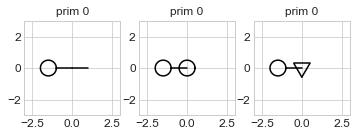

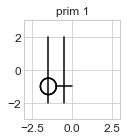

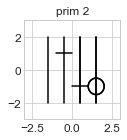

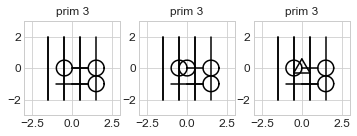

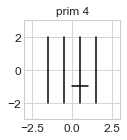

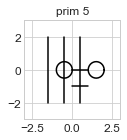

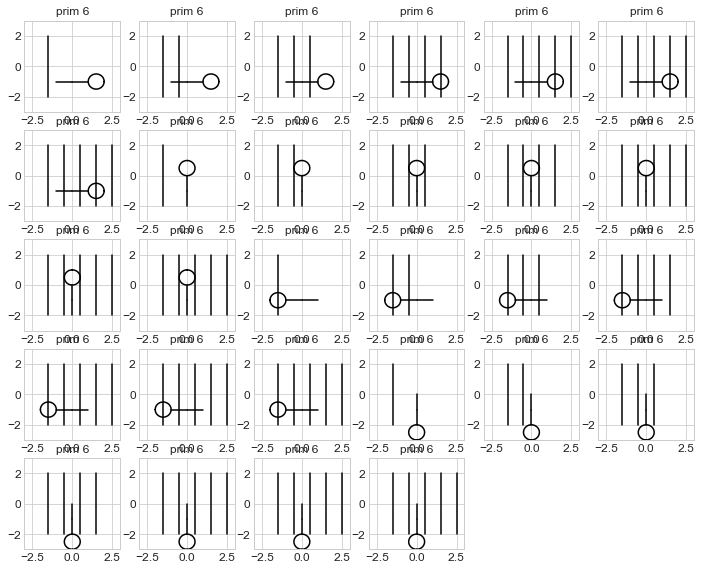

<Figure size 864x144 with 0 Axes>

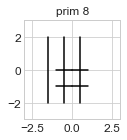

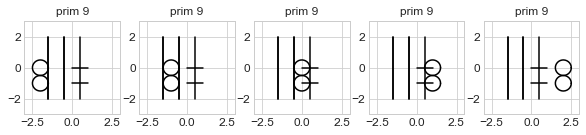

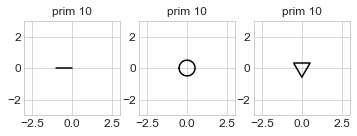

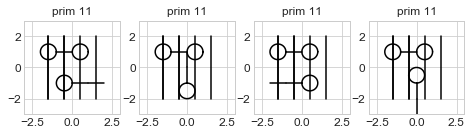

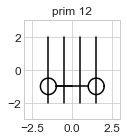

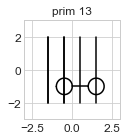

<Figure size 864x144 with 0 Axes>

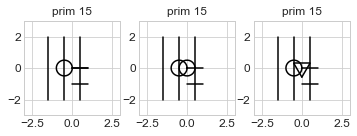

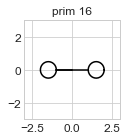

<Figure size 864x144 with 0 Axes>

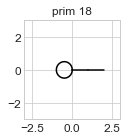

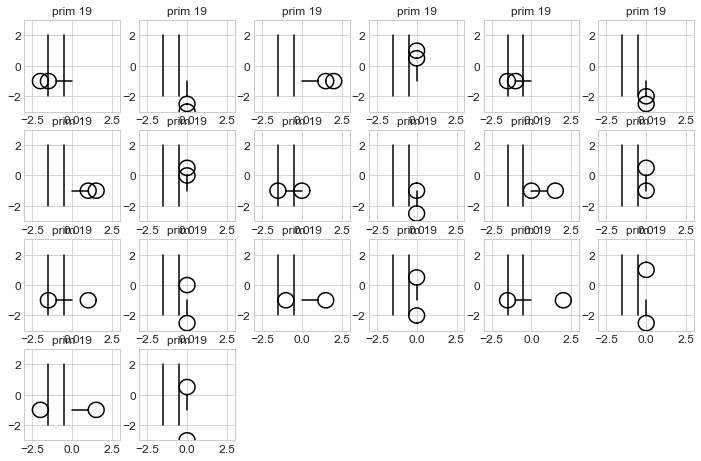

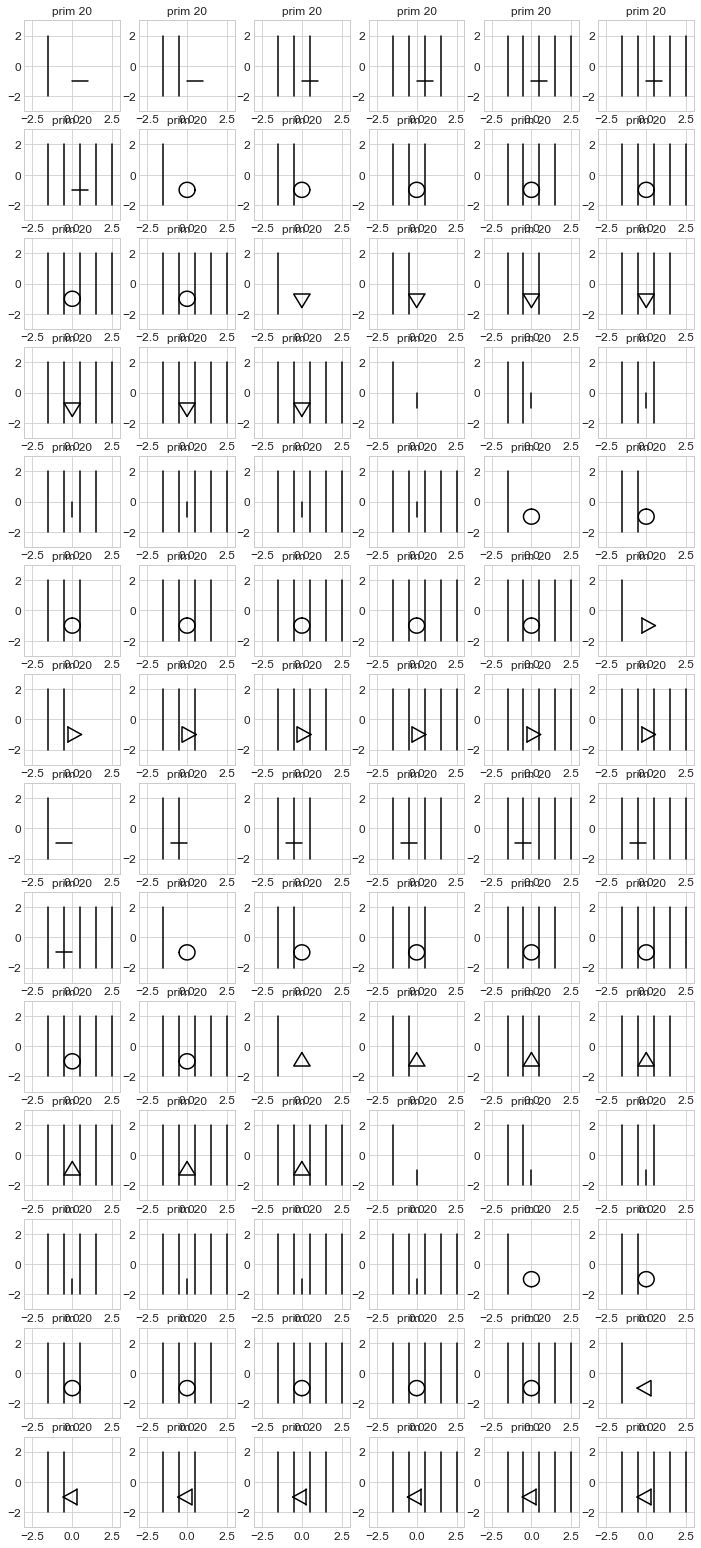

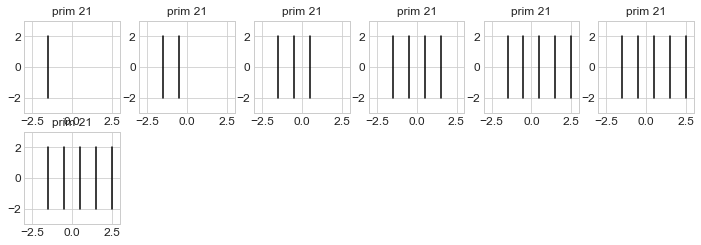

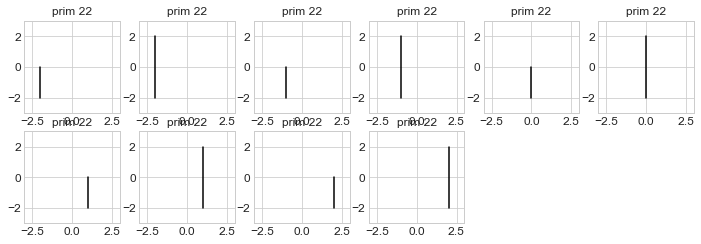

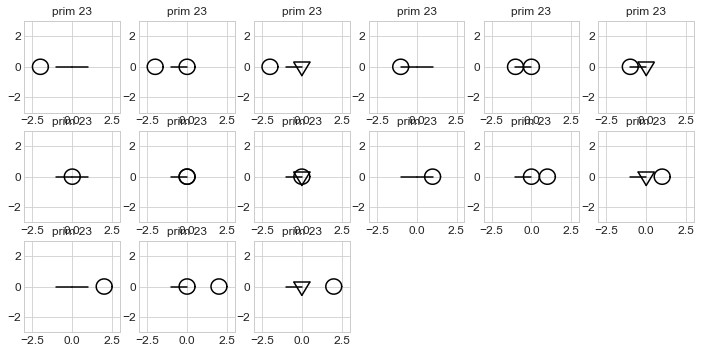

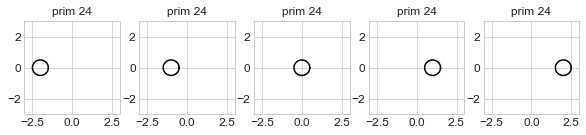

In [5]:
# ======= FOR EACH PRIMITIVE PLOT ALL POSSIBILITIES FILLING IN THE HOLES WITH CONCRETE THING
from dreamcoder.domains.draw.drawPrimitives import *
import dreamcoder.domains.draw.primitives as PP
from dreamcoder.type import arrow
from itertools import product

# P[0].parse("(connect line circle)").evaluate([])

def visualizePrimitives(primitives, export="/tmp/draw_primitives"):

    matrix = []
    for i, p in enumerate(primitives):
        print(i)
        if not p.isInvented: continue
        t = p.tp
        eprint(p,":",p.tp)
        if t.returns() != tstroke:
            eprint("\t(does not return a tstroke)")
            continue

        def argumentChoices(t):
            if t in [tmaybe(tangle), tangle]:
                return [j*(2*pi/4) for j in range(4)]
            elif t == tstroke:
                return [PP._line, PP._circle, PP.polygon(3)]
            elif t in [tmaybe(tscale), tscale]:
                return [2., 4.]
            elif t in [tmaybe(tdist), tdist]:
                return [-2., -1., 0, 1., 2.]
            elif t == ttrorder:
                return PP.ORDERS
            elif t== trep:
                return [j+1 for i, j in enumerate(range(7))]
            else: return []

        ts = [] # holds all cases for this primitive
        print(t.functionArguments())
        print([argumentChoices(t) for t in t.functionArguments() ])
        for arguments in product(*[argumentChoices(t) for t in t.functionArguments() ]):
            t = p.evaluate([])
            for a in arguments: t = t(a)
            ts.append(t)
            
        matrix.append(ts)
    

    # ==== make and save plot
    def save(ts, j):
        n = len(ts)
        ncol = 6
        nrow = ceil(n+1/6)
        fig = plt.figure(figsize=(ncol*2, nrow*2))
        for ii, nn in enumerate(ts):
            ax = plt.subplot(nrow, ncol, ii+1)
            PP.plotOnAxes(nn, ax)
            plt.title("prim {}".format(j))
        fig.savefig("{}_p#{}.png".format(export, j))
    for j, ts in enumerate(matrix):
        save(ts, j)
        
#     # Only visualize if it has something to visualize.
#     if len(matrix) > 0:
#         matrix = montageMatrix(matrix)
#         # imshow(matrix)
        
#         import scipy.misc
#         scipy.misc.imsave(fn, matrix)
#         #    show()
#     else:
#         eprint("Tried to visualize primitives, but none to visualize.")

    return matrix

P = result.grammars[-1].primitives
matrix = visualizePrimitives(P)

In [135]:
PP.polygon(3)

[array([[-0.5       ,  0.28867513],
        [ 0.5       ,  0.28867513]]),
 array([[-2.22044605e-16, -5.77350269e-01],
        [-5.00000000e-01,  2.88675135e-01]]),
 array([[ 5.00000000e-01,  2.88675135e-01],
        [-2.22044605e-16, -5.77350269e-01]])]

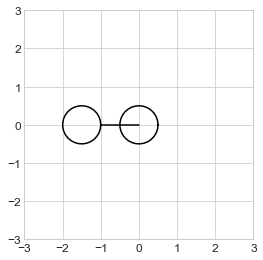

In [87]:
PP.plot(ts[1])

In [81]:
len(ts)

NameError: name 'ts' is not defined

In [78]:
PP.thetas

NameError: name 'PP' is not defined

In [76]:
primitives = result.grammars[-1].primitives
print(primitives[20])
print(primitives[20].tp)
print(primitives[20].tp.returns())
print(primitives[20].tp.functionArguments()[0])

primitives[20].evaluate([])()

#(lambda (lambda (lambda (connect (#(lambda (repeat (#(lambda (lambda (transform line (transmat $0 (Some angle2) $1 (Some dist1) None)))) (Some dist2) (Some scale7)) $0 (transmat None None (Some dist9) None None))) $0) (transform $1 (transmat None $2 None (Some dist3) None))))))
maybe(tangle) -> tstroke -> trep -> tstroke
tstroke
maybe(tangle)


<function dreamcoder.program.Abstraction.evaluate.<locals>.<lambda>(x)>

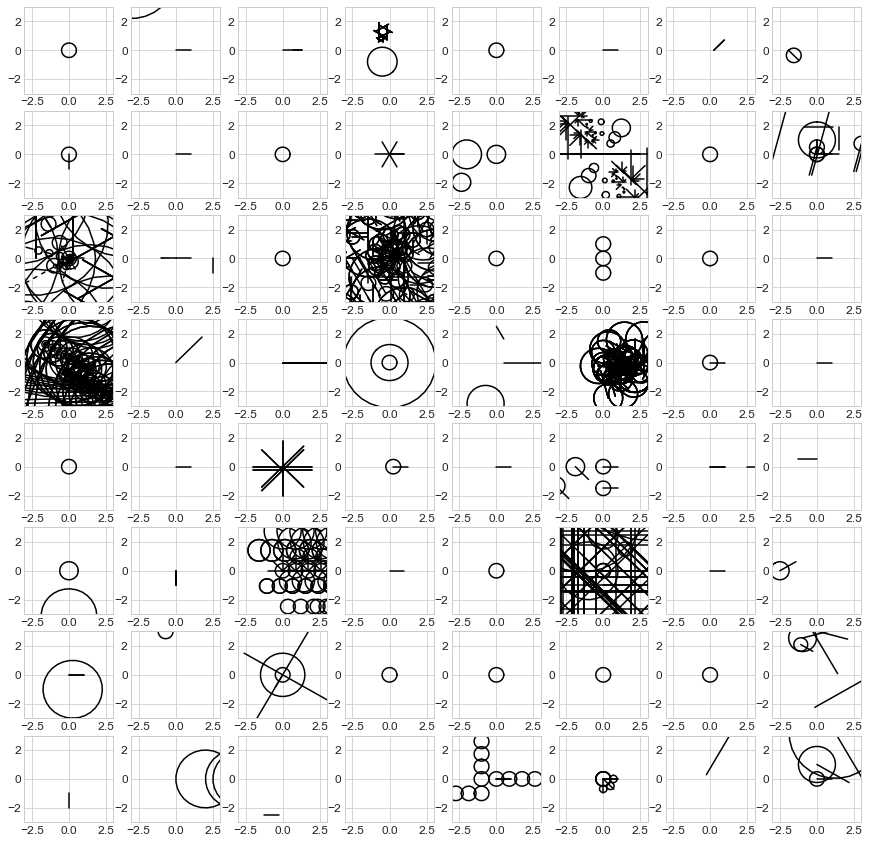

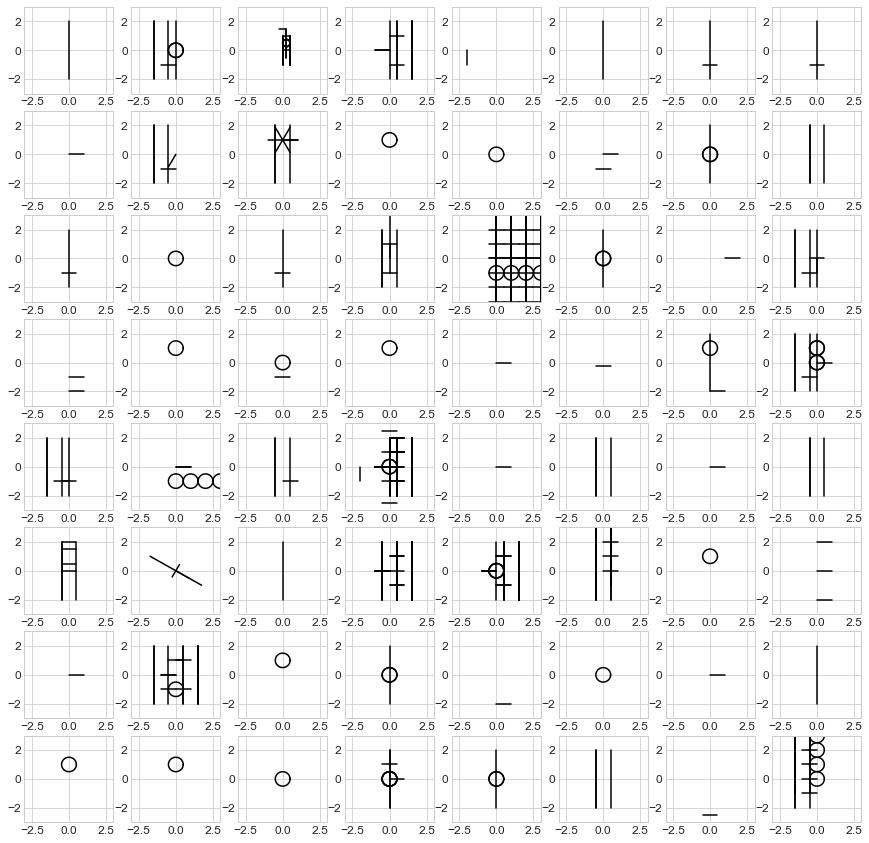

In [15]:
# ====== DREAM FROM LEARNED GRAMMAR
from dreamcoder.domains.draw.main import dreamFromGrammar
import dreamcoder.domains.draw.primitives as P

# === initial grammar
dreams = dreamFromGrammar(N=64)
plt.figure(figsize=(15, 15))
plt.title("grammar before train iteration")
for i, d in enumerate(dreams):
    ax = plt.subplot(8,8,i+1)
    P.plotOnAxes(d.evaluate([]), ax)
    
# ==== final grammar
G = result.grammars[-1]
dreams = dreamFromGrammar(G, N=64)
plt.figure(figsize=(15, 15))
plt.title("grammar after {} iteration".format(len(result.grammars)))
for i, d in enumerate(dreams):
    ax = plt.subplot(8,8,i+1)
    P.plotOnAxes(d.evaluate([]), ax)

In [101]:
# ======== LOOK AT TEST STIMULI
result.testSearchTime

{}

[autoreload of segmentation failed: Traceback (most recent call last):
  File "/Users/lucastian/anaconda3/envs/ec/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/lucastian/anaconda3/envs/ec/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/Users/lucastian/anaconda3/envs/ec/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/lucastian/anaconda3/envs/ec/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_wi

FAILED TO LOAD STIM .png file...


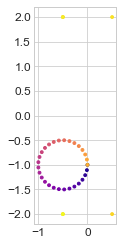

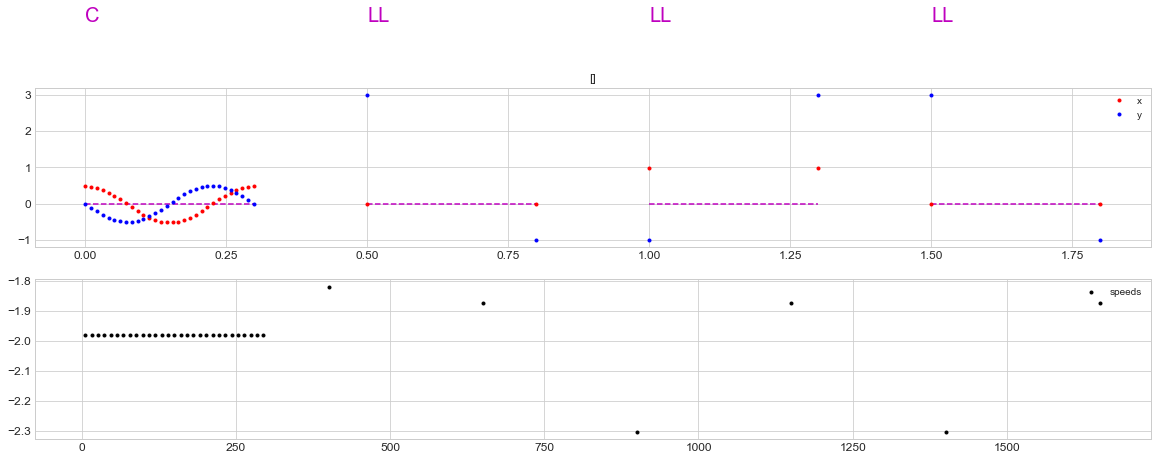

In [89]:
TASKNUM = 30

# === TOOLS to analyze/plot dreamcoder programs
from dreamcoder.domains.draw.makeDrawTasks import makeSupervisedTasks
# tasks = makeSupervisedTasks(trainset=trainset, doshaping=True)[0]

# assert len(result.taskSolutions)==len(tasks)

# ==== given program convert into "strokes", so that can pass into same behavioral aalysis as for subjects
import numpy as np
def program2strokes(program):
    # program is list of numpy arrays
    # will put down times in order. will be in fake milliseconds. 
    
    on = 1
    off = 300
    strokes = []
    for p in program:
        times = np.linspace(on, off, p.shape[0])
        p = np.concatenate((p, times[:,None]), axis=1)
        on+=500
        off+=500
        strokes.append(p)
    return strokes

    
# strokes = program2strokes(dreams[1].evaluate([]))
strokes = program2strokes(result.allFrontiers[tasks[TASKNUM]].bestPosterior.program.evaluate([]))
strokes = [s.tolist() for s in strokes]
# === 3) Load tools to to things with tasks/programs
datflat = []
datflat.append({
    "trialstrokes":strokes,
    "trialonset": 0,
    "stimname": "test",
    "trialprimitives":[],
    "trialcircleparams":[],
    "condition":[],
})


# ==== do segmentation
import sys
sys.path.append("/Users/lucastian/tenen/TENENBAUM/drawgood/experiments")
from segmentation import *
from utils import *


# PLOT
getSegmentation(datflat)

from plotsDatFlat import *
from plotsSingleSubj import *
from segmentation import *

plotDrawingAndTimecourse(datflat[0])


In [81]:
len(tasks[0])

98

In [125]:
list(result.allFrontiers[tasks[8]])

[FrontierEntry(program=#(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)), logPrior=-2.883850317439259, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)) angle4), logPrior=-7.519560953406131, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)) angle2), logPrior=-7.83812587986904, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)) angle0), logPrior=-7.901931741388596, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 N

In [112]:
result.taskSolutions[tasks[0]]
result.allFrontiers[tasks[5]].bestPosterior.program.betaNormalForm()
# print(result.allFrontiers[tasks[0]].bestPosterior.program.parseHumanReadable())


(transform line (transmat None None (Some dist8) None None))

In [322]:
result.allFrontiers[tasks[5]].bestPosterior.program.evaluate([])

[array([[2., 0.],
        [3., 0.]])]

In [155]:
from dreamcoder.domains.draw.main import dreamFromGrammar

dreams = dreamFromGrammar(N=10)
for d in dreams:
    print(d)
    print('--')

(repeat circle rep2 (transmat None (Some angle5) None (Some dist8) None))
--
circle
--
(reflect (reflect (transform (transform (connect (transform (transform (transform line (transmat (Some scale5) None (Some dist14) None None)) (transmat None (Some angle2) None (Some dist7) (Some tsr))) (transmat (Some scale6) (Some angle6) None None (Some trs))) circle) (transmat (Some scale4) None (Some dist17) (Some dist17) (Some rst))) (transmat None None None None None)) angle7) angle6)
--
line
--
(transform circle (transmat (Some scale3) (Some angle5) (Some dist6) (Some dist14) None))
--
(connect (repeat (reflect line angle7) rep1 (transmat None None None (Some dist7) None)) line)
--
(repeat (repeat (reflect (repeat (reflect (transform (repeat (repeat line rep6 (transmat None None (Some dist13) None (Some rst))) rep3 (transmat (Some scale2) None None (Some dist4) None)) (transmat (Some scale3) (Some angle8) (Some dist12) (Some dist14) (Some srt))) angle5) rep1 (transmat (Some scale3) None None (

In [182]:
print(dreams[4])
for i in dreams[4].walk():
    print(i)
    
# (reflect (repeat line rep0 (transmat None None None (Some dist4) (Some trs))) angle4)

(transform (reflect (connect circle circle) angle4) (transmat (Some scale0) (Some angle6) None None (Some rts)))
(0, (transform (reflect (connect circle circle) angle4) (transmat (Some scale0) (Some angle6) None None (Some rts))))
(0, (transform (reflect (connect circle circle) angle4)))
(0, transform)
(0, (reflect (connect circle circle) angle4))
(0, (reflect (connect circle circle)))
(0, reflect)
(0, (connect circle circle))
(0, (connect circle))
(0, connect)
(0, circle)
(0, circle)
(0, angle4)
(0, (transmat (Some scale0) (Some angle6) None None (Some rts)))
(0, (transmat (Some scale0) (Some angle6) None None))
(0, (transmat (Some scale0) (Some angle6) None))
(0, (transmat (Some scale0) (Some angle6)))
(0, (transmat (Some scale0)))
(0, transmat)
(0, (Some scale0))
(0, Some)
(0, scale0)
(0, (Some angle6))
(0, Some)
(0, angle6)
(0, None)
(0, None)
(0, (Some rts))
(0, Some)
(0, rts)


In [1]:
# === walk along the string. whenever you see a line or circle, keep note of its depth.
# === outputs list of primitives and thier depths
# === NOTE problem, this cannot deal with lets say want to connect(connect(p1, p2), p3) --> i.e,, making a new thing
# that is three primtiives. it will call these different depth (2,2,1). 
# === PROBLEM: doesn't get repeats yet - will only output one, even though repeating multiple times.
words = str(dreams[1].betaNormalForm()).split()
depth = 0
prim = []
depthlist = []
for w in words:
    
    if w.find("circle")>-1:
        prim.append("C")
        depthlist.append(depth)
    elif w.find("line")>-1:
        prim.append("L")
        depthlist.append(depth)
        
    print("depth {}: {}".format(depth, w))       
    if w.find("(")>-1:
        depth+=1
    elif w.find(")")>-1:
        depth-=1

print(prim)
print(depthlist)

NameError: name 'dreams' is not defined

In [291]:
dreams[1]

(transform (repeat (repeat (transform (reflect (reflect (repeat (reflect (reflect (reflect (repeat circle rep1 (transmat (Some scale0) (Some angle6) (Some dist9) None (Some trs))) angle4) angle0) angle5) rep6 (transmat None None (Some dist3) (Some dist6) None)) angle0) angle2) (transmat None (Some angle4) None (Some dist3) (Some rts))) rep5 (transmat None None None (Some dist11) (Some rts))) rep3 (transmat None None None None (Some rts))) (transmat (Some scale1) None None (Some dist8) None))

FAILED TO LOAD STIM .png file...


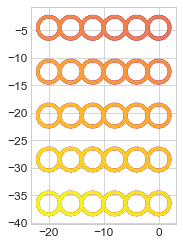

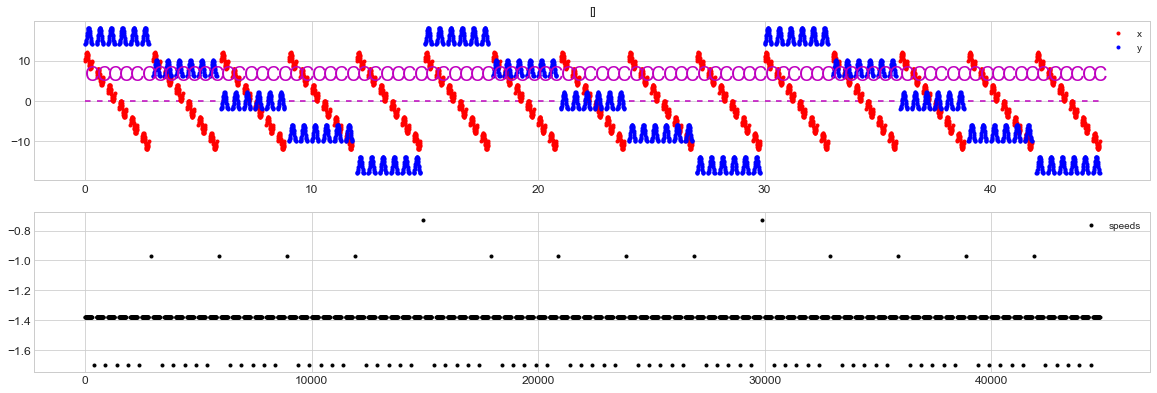

In [251]:
tmp = np.linspace(1, 50, 50)

tmp[-1,None]

print(tmp[:, None].shape)

(50, 1)


In [105]:
result.allFrontiers[tasks[0]].bestPosterior.program

(#(lambda (connect $0 line)) circle)

In [158]:
def reorderProgram():
    # given a program, output all the ways it could be ordered if allowed to permute within each level:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-158-974a76825963>, line 1)

In [153]:
# ===== given some program and some behavioral sequence compute the likelihood
# === first thing, given some sequence, get edit distance from that sequence:
import pyxdameraulevenshtein as dl

# 1) get behavior in terms of circles and lines (each numnbered)
def segmentBehavior():
    # --- name circles and lines based on lica
    # -- first divide drawing into 4 vertical stripes
    
    return ["C1", "C2", "L1", "L2"]

def segmentProgram():
    return ["C1", "L1", "C2", "L2"]

def stringDist(a, b):
    # rerutns value between 0 and 1 (1 is max difference)
    # first map all the items to idx identifiers (e.g. from  ["C1", "C2", "L1", "L2"] to [1,2,3,4]
#     alphabet = ["C1", "C2", "L1", "L2"]
#     A = [alphabet.index(aa) for aa in a]
#     B = [alphabet.index(bb) for bb in b]
    
    return dl.normalized_damerau_levenshtein_distance(a,b)
    
    
    
stringDist(segmentBehavior(), segmentProgram())



0.25

In [151]:
import pyxdameraulevenshtein as dl

dl.damerau_levenshtein_distance(["C2", "C0", "L1", "L2"], ["C9", "LLL", "C", "L"])


4

loaded path: experimentOutputs/draw/2019-10-01T02:19:27.116528/draw_aic=1.0_arity=3_ET=1800_it=6_MF=5_noConsolidation=False_pc=10_RW=False_solver=python_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_rec=False.pickle
Of the 1 checkpoints that you gave me, here is a matrix showing the overlap between the tasks solved:
	ck1
ck1	15%	
Of the 1 checkpoints that you gave me, here is a matrix showing the overlap between the tasks solved:
	ck1
ck1	15%	


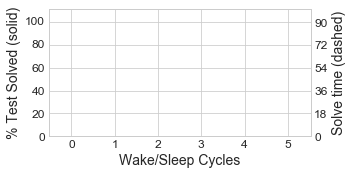

In [12]:
resultPaths=[f]
plotECResult(resultPaths)
showSynergyMatrix([result])

In [105]:
P = result.allFrontiers[tasks[0]].bestPosterior.program
print(P)


line
